In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report,f1_score,precision_score,accuracy_score,recall_score
#pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn
#!pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings ("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.cluster import KMeans



C:\Users\pprat\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df  = pd.read_csv('Abhudaya_dummy.csv')

In [3]:
df.head()

,Cust No.,First Name,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
0,1,Walter,Hargrave,619,France,Female,42,2.0,NaN,1.0,Yes,Yes,101349,1
1,2,Daniel,Hill,608,Spain,Female,41,1.0,83807.86,1.0,No,Yes,112543,0
2,3,Melissa,Onio,502,France,Female,42,8.0,159660.80,3.0,Yes,No,113932,1
3,4,Miley,Boni,699,France,Female,39,1.0,NaN,2.0,No,No,93827,0
4,5,James,Mitchell,850,Spain,Female,43,2.0,125510.82,1.0,Yes,Yes,79084,0


In [4]:
df.shape

(10071, 14)

In [5]:
df.drop('Cust No.',axis=1,inplace = True) # droping the customer feature as it wont help us in analysis 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10071 entries, 0 to 10070
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   First Name       10071 non-null  object 
 1   Surname          10071 non-null  object 
 2   Credit Score     10071 non-null  int64  
 3   Geography        9999 non-null   object 
 4   Gender           10003 non-null  object 
 5   Age              10071 non-null  int64  
 6   Tenure           10053 non-null  float64
 7   Balance          6451 non-null   float64
 8   Num Of Policies  9904 non-null   float64
 9   Credit Card      10071 non-null  object 
 10  Active Member    10071 non-null  object 
 11  Salary           10071 non-null  int64  
 12  Exited           10071 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1023.0+ KB


In [7]:
(df.isnull().sum()/len(df))*100  

First Name          0.000000
Surname             0.000000
Credit Score        0.000000
Geography           0.714924
Gender              0.675206
Age                 0.000000
Tenure              0.178731
Balance            35.944792
Num Of Policies     1.658227
Credit Card         0.000000
Active Member       0.000000
Salary              0.000000
Exited              0.000000
dtype: float64

 as we can see that the balance feature has 35 % null values

In [8]:
df_n = df

In [9]:
df_n = df_n[df_n['Num Of Policies'].isnull()==False]

In [10]:
df_n = df_n[df_n['Geography'].isnull()==False]

In [11]:
df = df_n

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9832 entries, 0 to 10069
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   First Name       9832 non-null   object 
 1   Surname          9832 non-null   object 
 2   Credit Score     9832 non-null   int64  
 3   Geography        9832 non-null   object 
 4   Gender           9771 non-null   object 
 5   Age              9832 non-null   int64  
 6   Tenure           9828 non-null   float64
 7   Balance          6311 non-null   float64
 8   Num Of Policies  9832 non-null   float64
 9   Credit Card      9832 non-null   object 
 10  Active Member    9832 non-null   object 
 11  Salary           9832 non-null   int64  
 12  Exited           9832 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1.1+ MB


In [13]:
df['Exited'].value_counts()

Exited
0    7800
1    2032
Name: count, dtype: int64

In [14]:
# WE LOST around 3% of data to remove null values 
# from all features but dropping null values from balance  will not be appropriate .
# hence we will impute the values where balance and other features will be null 

In [15]:
# we would do null imputation by two different methods one is by using linear regression 
# and other with knn imputation and we will check accuracy of both 
# whichever work fine we will go with that method .

# First method by null value imputation - Ny using Linear Regression 

In [16]:
## To do Linear regression imputation we will create two different dataframes by using above dataframe 
## In first data frame we will consider "balance true values" and we will use that datframe to train the model
## In second data frame we will consider "balance false values" and we will use that datframe to predict missing values.

# Preprocessing the data for null value imputation Using linear regression

In [17]:
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'O':
        df[i] = le.fit_transform(df[i])

In [18]:
df.head()

,First Name,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
0,212,1101,619,0,0,42,2.0,NaN,1.0,1,1,101349,1
1,61,1163,608,2,0,41,1.0,83807.86,1.0,0,1,112543,0
2,138,2018,502,0,0,42,8.0,159660.80,3.0,1,0,113932,1
3,142,286,699,0,0,39,1.0,NaN,2.0,0,0,93827,0
4,110,1801,850,2,0,43,2.0,125510.82,1.0,1,1,79084,0


In [19]:
# as we are going with linear regression just checking the descriptive stats 

In [20]:
df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].describe()

,Credit Score,Age,Tenure,Balance,Num Of Policies,Salary
count,9832.000000,9832.000000,9828.000000,6311.000000,9832.000000,9832.000000
mean,650.292921,39.007018,5.008140,119907.324999,1.531428,100133.187449
std,96.908705,10.600976,2.895932,30562.821953,0.591560,57560.414197
min,350.000000,18.000000,0.000000,1053.000000,1.000000,12.000000
25%,583.750000,32.000000,2.000000,100116.745000,1.000000,50974.500000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,100238.000000
75%,718.000000,44.000000,7.000000,139642.525000,2.000000,149458.250000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.000000


In [21]:
df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].skew()

Credit Score      -0.076301
Age                1.042858
Tenure             0.011162
Balance            0.038253
Num Of Policies    0.822019
Salary            -0.000096
dtype: float64

In [22]:
df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].kurt()

Credit Score      -0.426717
Age                1.549701
Tenure            -1.165715
Balance            0.365265
Num Of Policies    0.815534
Salary            -1.183271
dtype: float64

In [23]:
df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].corr()

,Credit Score,Age,Tenure,Balance,Num Of Policies,Salary
Credit Score,1.000000,-0.005140,-0.001289,-0.009320,0.008193,0.000862
Age,-0.005140,1.000000,-0.010486,-0.012861,-0.014252,-0.008129
Tenure,-0.001289,-0.010486,1.000000,0.002718,0.010364,0.008331
Balance,-0.009320,-0.012861,0.002718,1.000000,0.005639,-0.001756
Num Of Policies,0.008193,-0.014252,0.010364,0.005639,1.000000,0.013025
Salary,0.000862,-0.008129,0.008331,-0.001756,0.013025,1.000000


# As we can see that there is not relation between our independent variables and our target variable ( balance) for linear regression

Here we can see for some feature Kurtosis is very high that means the age , tenure , salary have extreme values from we  can assume that data is not normally distributed 

Two important considerations of the linear regression are not being followed by the data 

So using linear regression is not a good choice 


# Second method for null value imputation we can also use KNN imputation 

In [24]:
df.drop('First Name',axis=1,inplace=True)

In [25]:
df.drop('Surname',axis=1,inplace=True)

In [26]:
imputer = KNNImputer(n_neighbors=5)
df_in = imputer.fit_transform(df)

In [27]:
df_in

array([[6.19000e+02, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.01349e+05, 1.00000e+00],
       [6.08000e+02, 2.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.12543e+05, 0.00000e+00],
       [5.02000e+02, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.13932e+05, 1.00000e+00],
       ...,
       [7.77000e+02, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.56120e+05, 0.00000e+00],
       [4.50000e+02, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        8.69610e+04, 0.00000e+00],
       [8.19000e+02, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        8.94330e+04, 1.00000e+00]])

In [28]:
df = pd.DataFrame(df_in,columns=df.columns)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9832 entries, 0 to 9831
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Credit Score     9832 non-null   float64
 1   Geography        9832 non-null   float64
 2   Gender           9832 non-null   float64
 3   Age              9832 non-null   float64
 4   Tenure           9832 non-null   float64
 5   Balance          9832 non-null   float64
 6   Num Of Policies  9832 non-null   float64
 7   Credit Card      9832 non-null   float64
 8   Active Member    9832 non-null   float64
 9   Salary           9832 non-null   float64
 10  Exited           9832 non-null   float64
dtypes: float64(11)
memory usage: 845.1 KB


# This is how we impute missing values uing knn imputer .
All the missing values are being imputed .
instead of using mean , median or mode of the data this method is more impactful 
as we are here using nearest neighbour to predict null value

In [30]:
def summary_function(df):
    result = []
    
    for col in df.columns:
        if df[col].dtype != 'O':  # Exclude non-numeric columns
            # Calculate statistics
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            min_val = df[col].min()
            max_val = df[col].max()
            mean_val = df[col].mean()
            median_val = df[col].median()
            variance = df[col].var()
            std_dev = df[col].std()
            kurtosis = df[col].kurt()
            skewness = df[col].skew()
            
            # Append column statistics to result
            stats = OrderedDict({
                'Feature_Name': col,
                'Count': df[col].count(),
                'Minimum': min_val,
                'Quarter 1': q1,
                "Mean": mean_val,
                'Median': median_val,
                'Quarter 3': q3,
                'Maximum': max_val,
                "Variance": variance,
                'Standard Deviation': std_dev,
                "Kurtosis": kurtosis,
                'Skewness': skewness,
                'IQR': iqr
            })
            
            # Outlier detection
            upper_limit = q3 + 1.5 * iqr
            lower_limit = q1 - 1.5 * iqr
            outliers = df[col][(df[col] < lower_limit) | (df[col] > upper_limit)]
            
            outlier_percentage = len(outliers) / len(df)
            outlier_comment = 'has outliers' if len(outliers) > 0 else 'no outliers'
            
            # Add outlier information
            stats['outlier_comment'] = outlier_comment
            stats['outlier_percentage'] = round(outlier_percentage, 4)
            
            result.append(stats)
        
    result_df = pd.DataFrame(result)
    
    # Skewness type
    skewtype = []
    for i in result_df['Skewness']:
        if i <= -1:
            skewtype.append('Highly Negatively Skewed')
        elif i <= -0.5:
            skewtype.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0:
            skewtype.append('Approx Normal Distribution (-ve)')
        elif 0 <= i < 0.5:
            skewtype.append('Approx Normal Distribution (+ve)')
        elif 0.5 <= i < 1:
            skewtype.append('Moderately Positively Skewed')
        else:
            skewtype.append('Highly Positively Skewed')
    
    result_df['Skew_Type'] = skewtype
    
    # Kurtosis Type
    k_type = []
    for i in result_df['Kurtosis']:
        if i <= -1:
            k_type.append('Highly Platykurtic Curve')
        elif -1 < i <= -0.5:
            k_type.append('Moderately Platykurtic Curve')
        elif -0.5 < i <= 0.5:
            k_type.append('Mesokurtic Curve')
        elif 0.5 <= i < 1:
            k_type.append('Moderately Leptokurtic Curve')
        else:
            k_type.append('Highly Leptokurtic Curve')
    
    result_df['Kurtosis_Type'] = k_type

    return result_df

In [31]:
summary_function(df)

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,outlier_comment,outlier_percentage,Skew_Type,Kurtosis_Type
0,Credit Score,9832,350.0,583.75,650.292921,652.00,718.000,850.00,9.391297e+03,96.908705,-0.426717,-0.076301,134.250,has outliers,0.0017,Approx Normal Distribution (-ve),Mesokurtic Curve
1,Geography,9832,0.0,0.00,0.743897,0.00,1.000,2.00,6.832605e-01,0.826596,-1.354255,0.505830,1.000,no outliers,0.0000,Moderately Positively Skewed,Highly Platykurtic Curve
2,Gender,9832,0.0,0.00,0.555228,1.00,1.000,2.00,2.593847e-01,0.509298,-1.645417,-0.081174,1.000,no outliers,0.0000,Approx Normal Distribution (-ve),Highly Platykurtic Curve
3,Age,9832,18.0,32.00,39.007018,37.00,44.000,92.00,1.123807e+02,10.600976,1.549701,1.042858,12.000,has outliers,0.0366,Highly Positively Skewed,Highly Leptokurtic Curve
4,Tenure,9832,0.0,2.00,5.008015,5.00,7.000,10.00,8.383750e+00,2.895471,-1.165241,0.011239,5.000,no outliers,0.0000,Approx Normal Distribution (+ve),Highly Platykurtic Curve
5,Balance,9832,1053.0,105208.83,119709.407206,119486.32,133905.024,250898.09,6.656888e+08,25800.945406,1.339428,0.062588,28696.194,has outliers,0.0408,Approx Normal Distribution (+ve),Highly Leptokurtic Curve
6,Num Of Policies,9832,1.0,1.00,1.531428,1.00,2.000,4.00,3.499429e-01,0.591560,0.815534,0.822019,1.000,has outliers,0.0073,Moderately Positively Skewed,Moderately Leptokurtic Curve
7,Credit Card,9832,0.0,0.00,0.705248,1.00,1.000,1.00,2.078943e-01,0.455954,-1.189369,-0.900485,1.000,no outliers,0.0000,Moderately Negatively Skewed,Highly Platykurtic Curve
8,Active Member,9832,0.0,0.00,0.514341,1.00,1.000,1.00,2.498197e-01,0.499820,-1.997112,-0.057396,1.000,no outliers,0.0000,Approx Normal Distribution (-ve),Highly Platykurtic Curve
9,Salary,9832,12.0,50974.50,100133.187449,100238.00,149458.250,199992.00,3.313201e+09,57560.414197,-1.183271,-0.000096,98483.750,no outliers,0.0000,Approx Normal Distribution (-ve),Highly Platykurtic Curve


# Some important observations from Custom summary function and visualizations are as follows 

Text(0, 0.5, 'count of credit score')

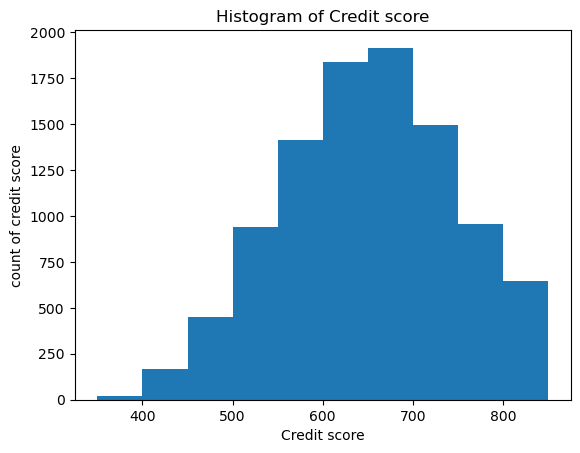

In [32]:
plt.hist(df['Credit Score'])
plt.title('Histogram of Credit score')
plt.xlabel('Credit score')
plt.ylabel('count of credit score')

<Axes: ylabel='count'>

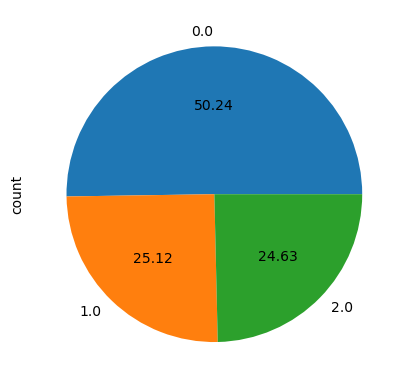

In [33]:
df['Geography'].value_counts().plot(kind='pie',autopct = '%0.2f')

<Axes: ylabel='count'>

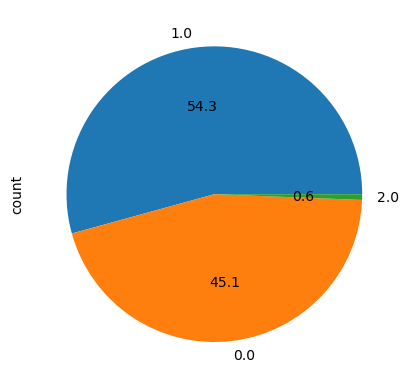

In [34]:
df['Gender'].value_counts().plot(kind='pie',autopct = '%0.1f')

Text(0, 0.5, 'count of tenure')

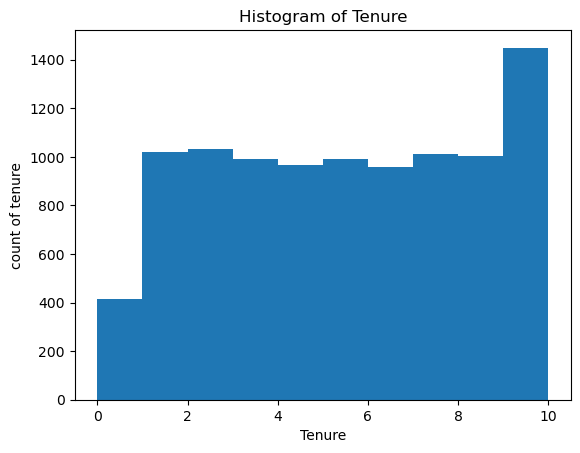

In [35]:
plt.hist(x=df['Tenure'],)
plt.title('Histogram of Tenure')
plt.xlabel('Tenure')
plt.ylabel('count of tenure')

Text(0, 0.5, 'Count of Age')

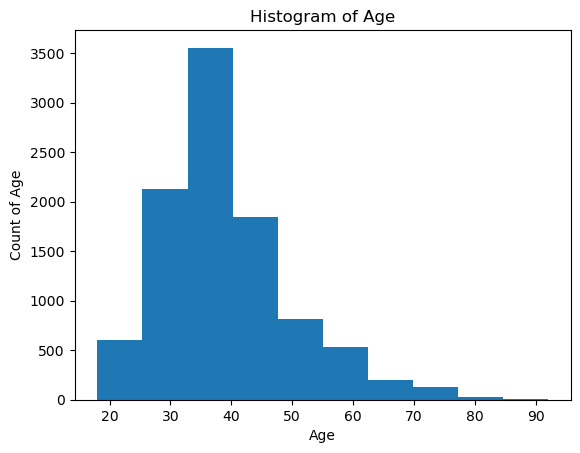

In [36]:
plt.hist(df["Age"])
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count of Age") 

<Axes: ylabel='count'>

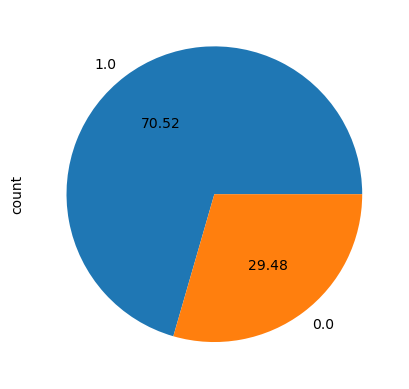

In [37]:
df["Credit Card"].value_counts().plot(kind="pie",autopct = "%0.2f") 

Text(0, 0.5, 'Count of Salary')

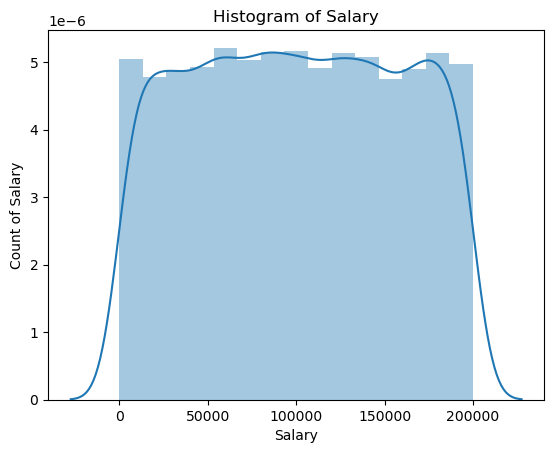

In [38]:
sns.distplot(df["Salary"],bins=15)
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("Count of Salary") 

In [39]:
df_copy = df.copy()

In [40]:
def outlier_treatment(df,col,method="quartile",strategy = "median"):
    
    col_data = df[col]
    
    # using quartile method to find outliers 
    
    if method == "quartile":
        q2 = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1 
        lowerlimit = q1 - 1.5*iqr
        upperlimit = q3 + 1.5*iqr
        
     # using std dav method to find outliers 
    
    elif method == "standerd_daviation":
        col_mean = df[col].mean()
        col_std = df[col].std()
        lowerlimit = col_mean - 2*col_std
        upperlimit = col_mean + 2*col_std
        
    else:
        print("Pass a correct method")
        
    # printing outliers 
    
    outliers = df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col]
    outlier_density = round(len(outliers)/len(df),4)
    
    if len(outliers) == 0 :
        print(f"the column {col} has no outliers")
    else:
        print(f"the column {col} has outliers")
        print("the outlier percentage is", outlier_density)
        print("outliers of column are : ")
        display(df[( col_data < lowerlimit ) | (col_data > upperlimit)])
    
    ## replacing outliers 
    if strategy == "median":
        df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col] = df[col].median()
    
    elif strategy == "mean":
        df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col] = df[col].mean() 
 
    else:
        print("Pass a correct strategy")
                      
    return df_copy

In [41]:
def odt_plot(df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
    
    # plotting boxplot 
    
    sns.boxplot(df[col],ax=ax1)
    ax1.set_title(col + " Boxplot")
    ax1.set_xlabel("Boxplot")
    ax1.set_ylabel("Values")
    
    # plotting Histogram with outliers 
    
    sns.distplot(df[col],ax=ax2)
    ax2.set_title(col + " Histogram with outliers")
    ax2.set_xlabel("Density")
    ax2.set_ylabel("Values")
    
    
    # plotting Histogram without outliers 
    
    y = outlier_treatment(df,col)
    
    sns.distplot(y[col],ax=ax3)
    ax3.set_title(col + " Histogram without outliers")
    ax3.set_xlabel("Density")
    ax3.set_ylabel("Values")

the column Credit Score has outliers
the outlier percentage is 0.0017
outliers of column are : 


,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
7,376.0,1.0,0.0,29.0,4.0,115046.740,4.0,1.0,0.0,119347.0,1.0
912,376.0,0.0,0.0,46.0,6.0,103772.170,1.0,1.0,0.0,157334.0,1.0
1144,363.0,2.0,0.0,28.0,6.0,146098.430,3.0,1.0,0.0,100615.0,1.0
1356,359.0,0.0,0.0,44.0,6.0,128747.690,1.0,1.0,0.0,146956.0,1.0
1559,350.0,2.0,1.0,54.0,1.0,152677.480,1.0,1.0,1.0,191973.0,1.0
1766,350.0,1.0,1.0,39.0,0.0,109733.200,2.0,0.0,0.0,123602.0,1.0
1890,358.0,2.0,0.0,52.0,8.0,143542.360,3.0,1.0,0.0,141959.0,1.0
2401,351.0,1.0,0.0,57.0,4.0,163146.460,1.0,1.0,0.0,169622.0,1.0
2507,365.0,1.0,1.0,30.0,0.0,127760.070,1.0,1.0,0.0,81538.0,1.0
7954,367.0,2.0,1.0,42.0,6.0,93608.280,1.0,1.0,0.0,168817.0,1.0


the column Geography has no outliers
the column Gender has no outliers
the column Age has outliers
the outlier percentage is 0.0366
outliers of column are : 


,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
58,511.0,2.0,0.0,66.0,4.0,114959.992,1.0,1.0,0.0,1643.0,1.0
85,652.0,2.0,0.0,75.0,10.0,130808.988,2.0,1.0,1.0,114676.0,0.0
104,670.0,2.0,0.0,65.0,1.0,98437.798,1.0,1.0,1.0,177656.0,1.0
158,646.0,0.0,0.0,73.0,6.0,97259.250,1.0,0.0,1.0,104720.0,0.0
181,510.0,0.0,1.0,65.0,2.0,106273.942,2.0,1.0,1.0,48072.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9814,780.0,0.0,1.0,67.0,10.0,21790.000,3.0,0.0,0.0,191485.0,0.0
9815,779.0,1.0,1.0,80.0,2.0,80252.000,3.0,1.0,0.0,64250.0,1.0
9822,523.0,0.0,0.0,82.0,2.0,144357.000,2.0,1.0,1.0,30140.0,0.0
9826,757.0,1.0,1.0,81.0,3.0,250169.000,3.0,1.0,0.0,177986.0,1.0


the column Tenure has no outliers
the column Balance has outliers
the outlier percentage is 0.0408
outliers of column are : 


,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
29,411.0,0.0,1.0,29.0,0.0,59697.17,2.0,1.0,1.0,53483.0,0.0
59,614.0,0.0,1.0,51.0,4.0,40685.92,1.0,1.0,1.0,46775.0,0.0
62,555.0,2.0,1.0,33.0,1.0,56084.69,2.0,0.0,0.0,178798.0,0.0
75,735.0,0.0,0.0,21.0,1.0,178718.19,2.0,1.0,0.0,22388.0,0.0
119,699.0,1.0,1.0,34.0,4.0,185173.81,2.0,1.0,0.0,120834.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9821,640.0,2.0,0.0,52.0,6.0,61544.00,4.0,1.0,1.0,98530.0,0.0
9823,413.0,0.0,0.0,42.0,1.0,194261.00,3.0,0.0,0.0,77819.0,0.0
9825,740.0,2.0,0.0,25.0,8.0,243069.00,3.0,0.0,0.0,133804.0,1.0
9826,757.0,1.0,1.0,37.0,3.0,250169.00,3.0,1.0,0.0,177986.0,1.0


the column Num Of Policies has outliers
the outlier percentage is 0.0073
outliers of column are : 


,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
7,652.0,1.0,0.0,29.0,4.0,115046.74,4.0,1.0,0.0,119347.0,1.0
70,738.0,1.0,1.0,58.0,2.0,133745.44,4.0,1.0,0.0,28374.0,1.0
1205,628.0,0.0,0.0,46.0,1.0,119486.32,4.0,1.0,0.0,31272.0,1.0
1420,819.0,1.0,0.0,49.0,1.0,120656.86,4.0,0.0,0.0,166164.0,1.0
1439,596.0,2.0,1.0,30.0,6.0,121345.88,4.0,1.0,0.0,41922.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9811,849.0,2.0,1.0,37.0,4.0,119486.32,4.0,1.0,1.0,24943.0,1.0
9817,543.0,1.0,1.0,46.0,8.0,155715.00,4.0,1.0,0.0,166389.0,1.0
9820,548.0,0.0,1.0,30.0,3.0,119486.32,4.0,0.0,1.0,93940.0,1.0
9821,640.0,2.0,0.0,52.0,6.0,119486.32,4.0,1.0,1.0,98530.0,0.0


the column Credit Card has no outliers
the column Active Member has no outliers
the column Salary has no outliers
the column Exited has outliers
the outlier percentage is 0.2067
outliers of column are : 


,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
0,619.0,0.0,0.0,42.0,2.0,129900.792,1.0,1.0,1.0,101349.0,1.0
2,502.0,0.0,0.0,42.0,8.0,159660.800,3.0,1.0,0.0,113932.0,1.0
5,645.0,2.0,1.0,44.0,8.0,113755.780,2.0,1.0,0.0,149757.0,1.0
7,652.0,1.0,0.0,29.0,4.0,115046.740,1.0,1.0,0.0,119347.0,1.0
16,653.0,1.0,1.0,58.0,1.0,132602.880,1.0,1.0,0.0,5098.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9824,699.0,2.0,1.0,55.0,1.0,132419.000,2.0,1.0,1.0,37351.0,1.0
9825,740.0,2.0,0.0,25.0,8.0,119486.320,3.0,0.0,0.0,133804.0,1.0
9826,757.0,1.0,1.0,37.0,3.0,119486.320,3.0,1.0,0.0,177986.0,1.0
9827,711.0,2.0,1.0,37.0,1.0,161425.000,2.0,1.0,0.0,51518.0,1.0


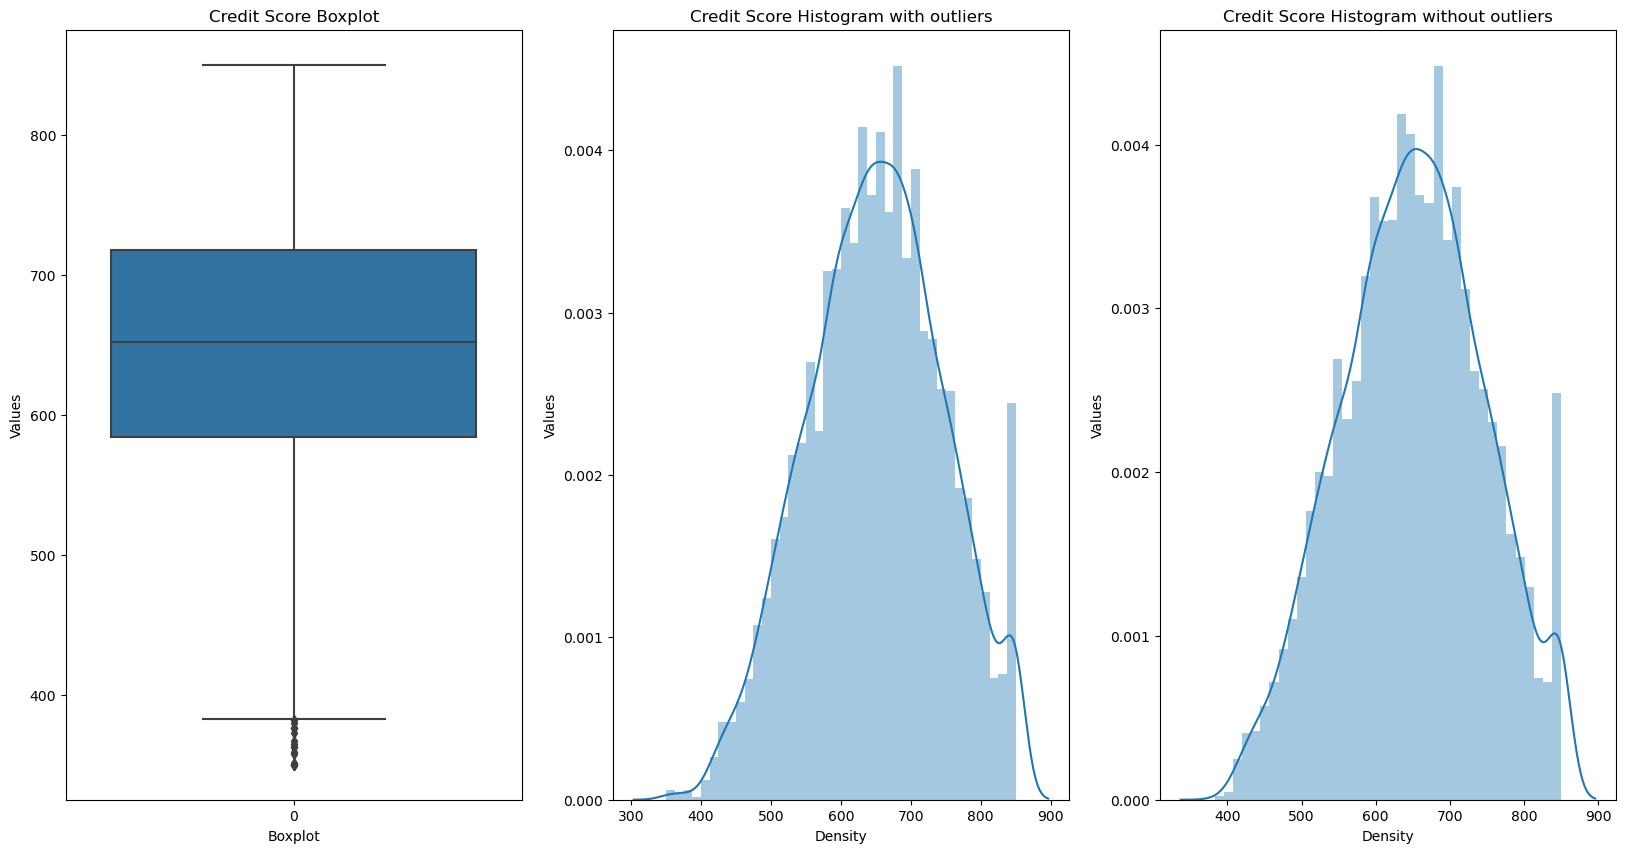

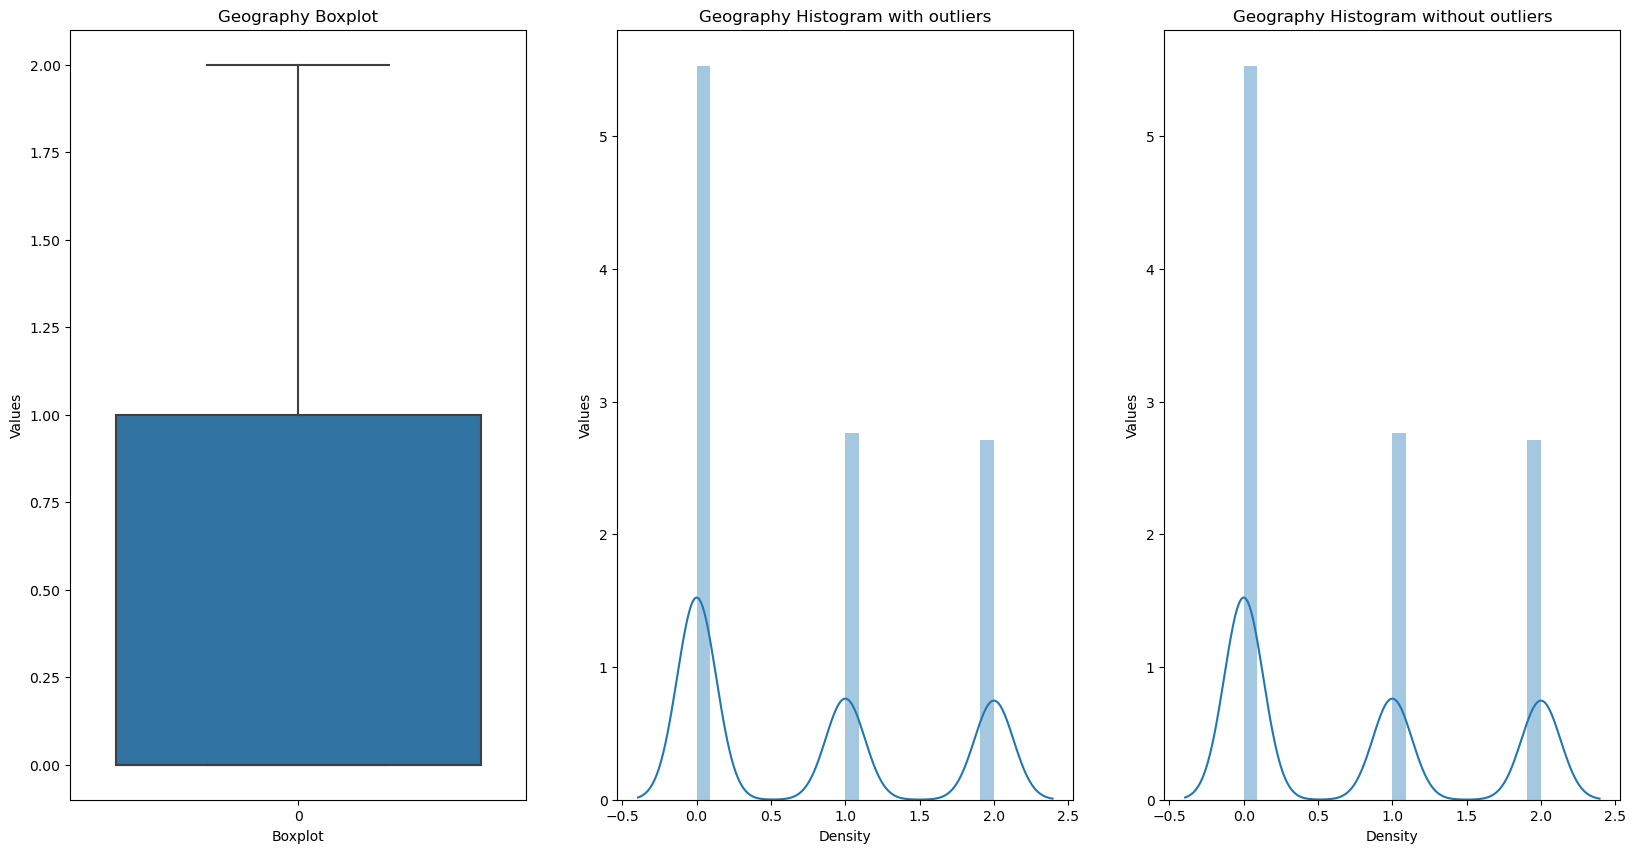

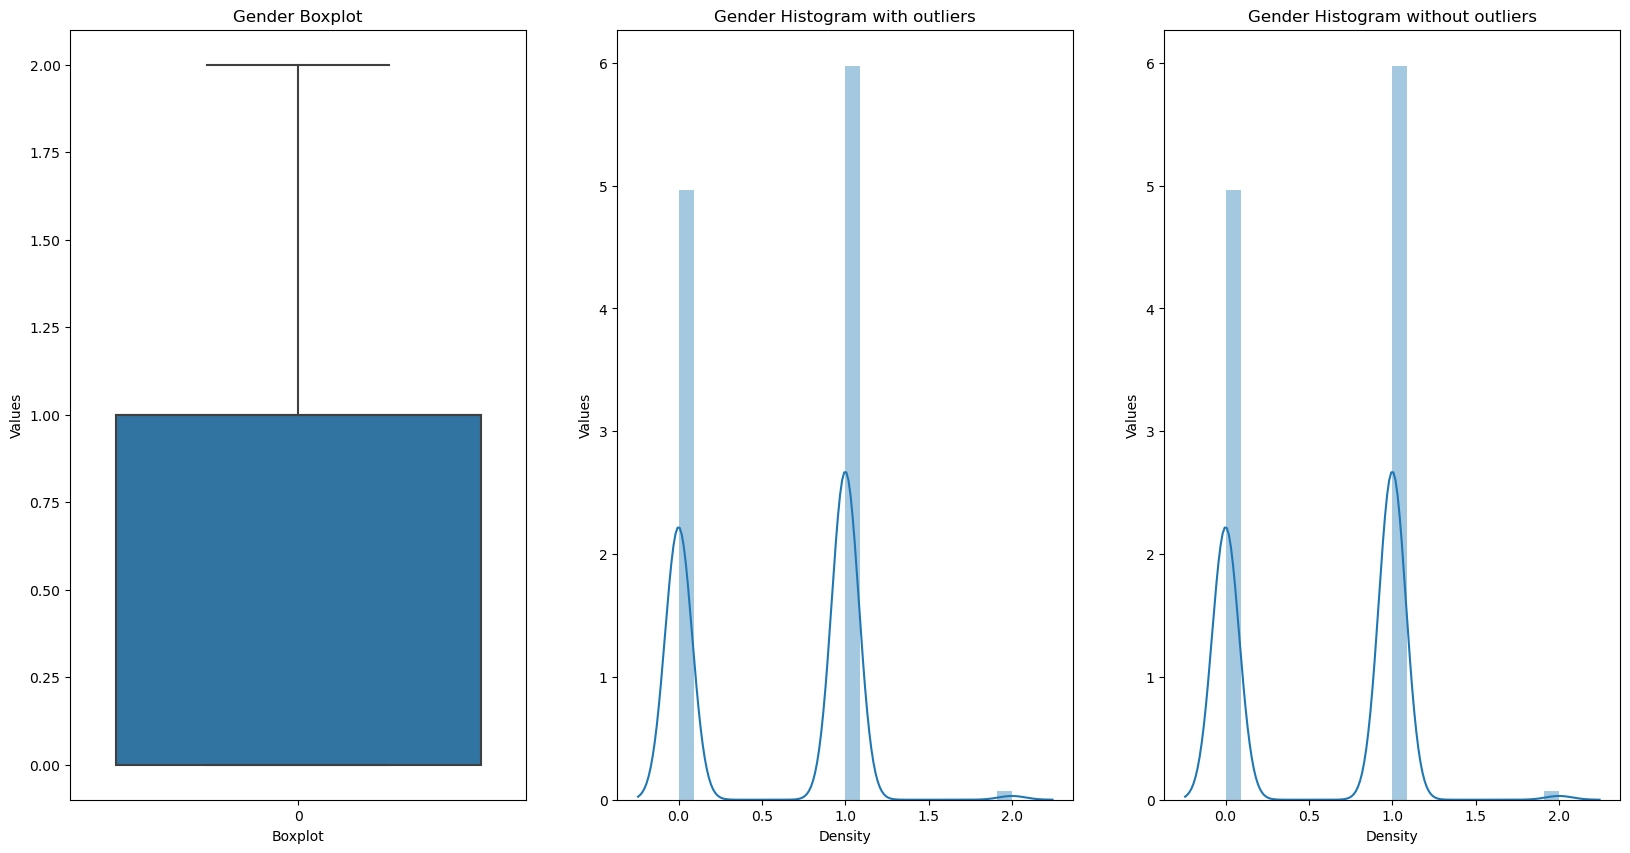

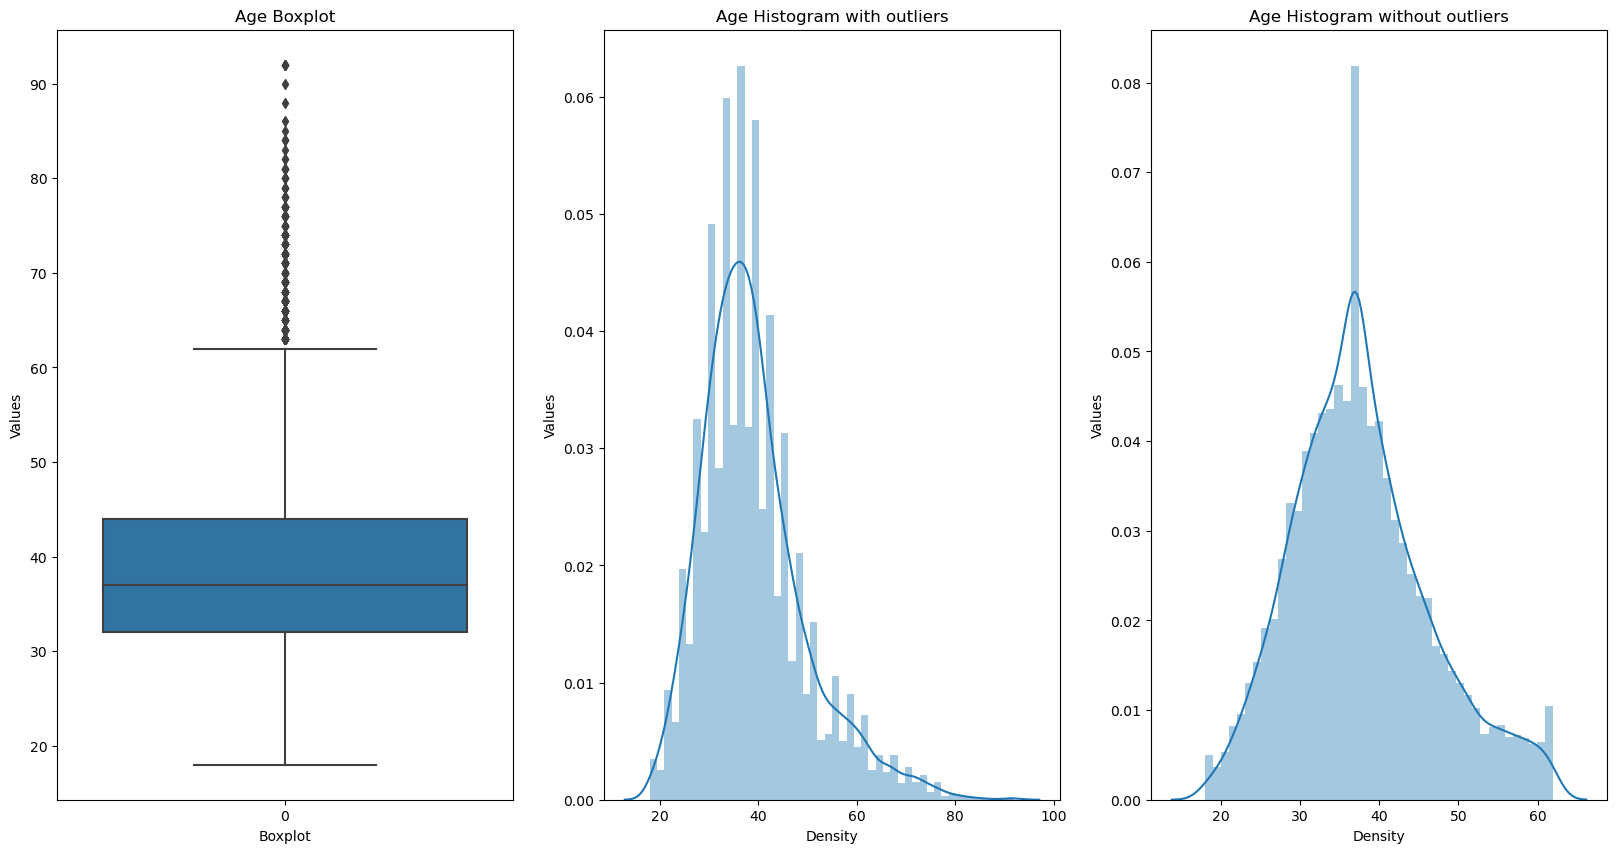

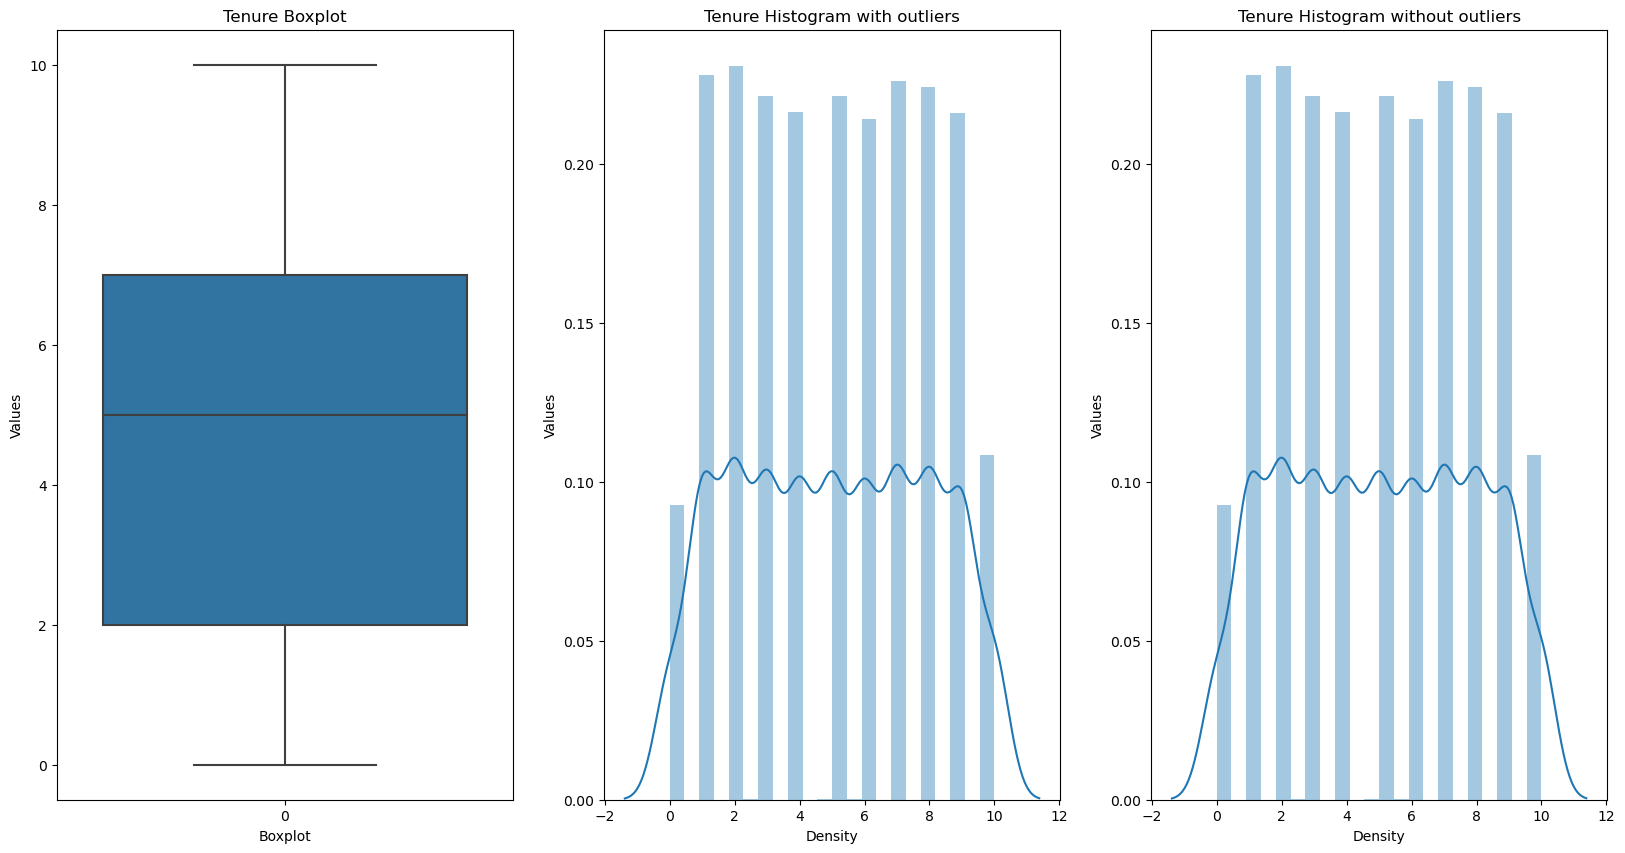

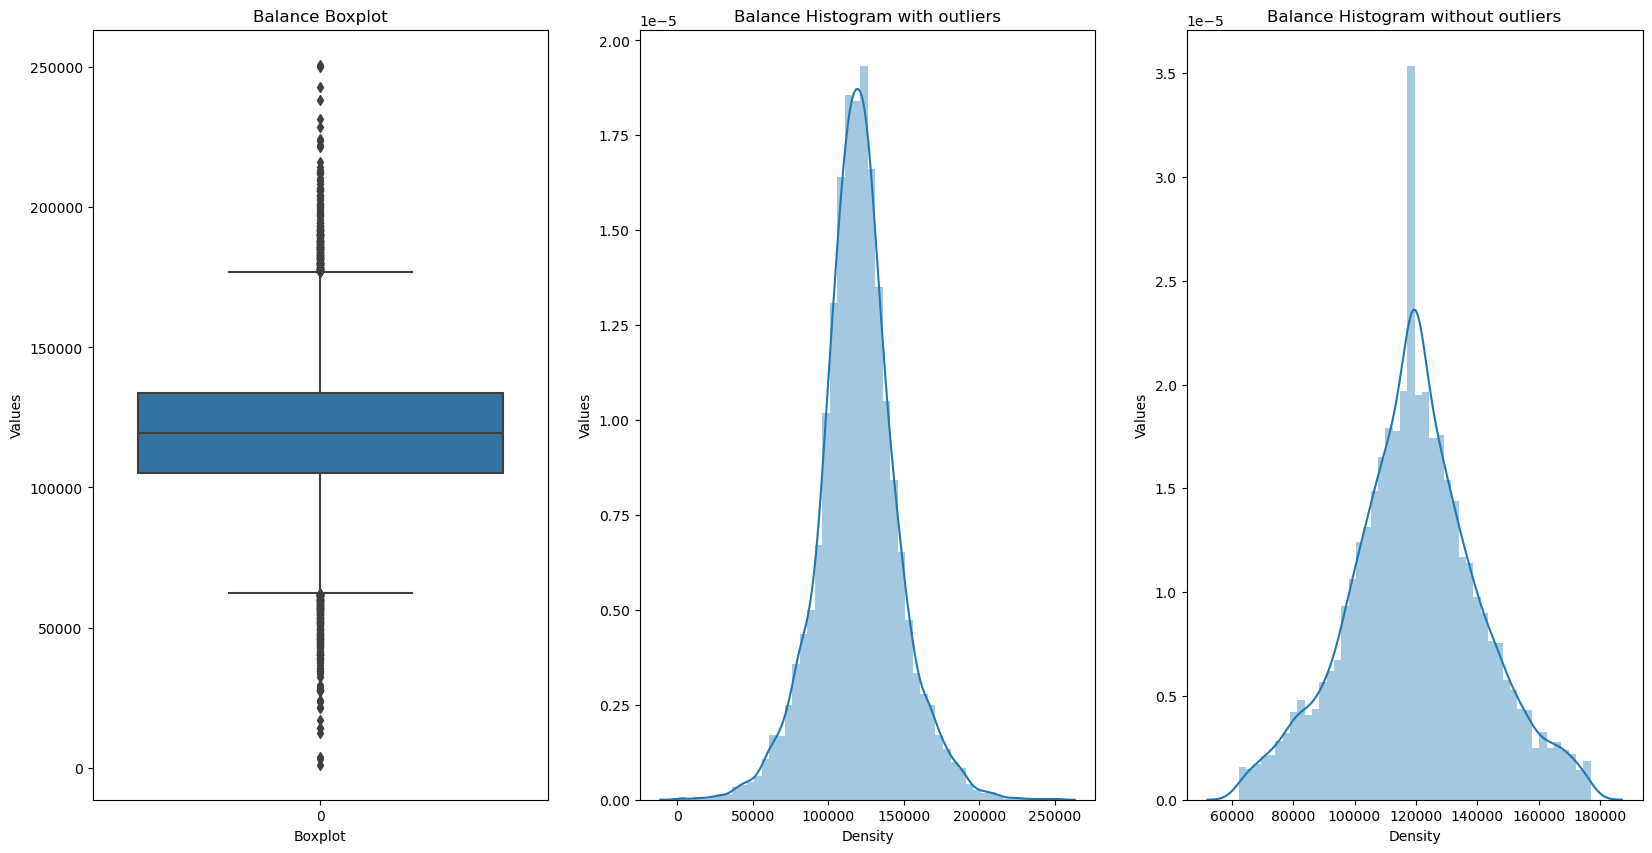

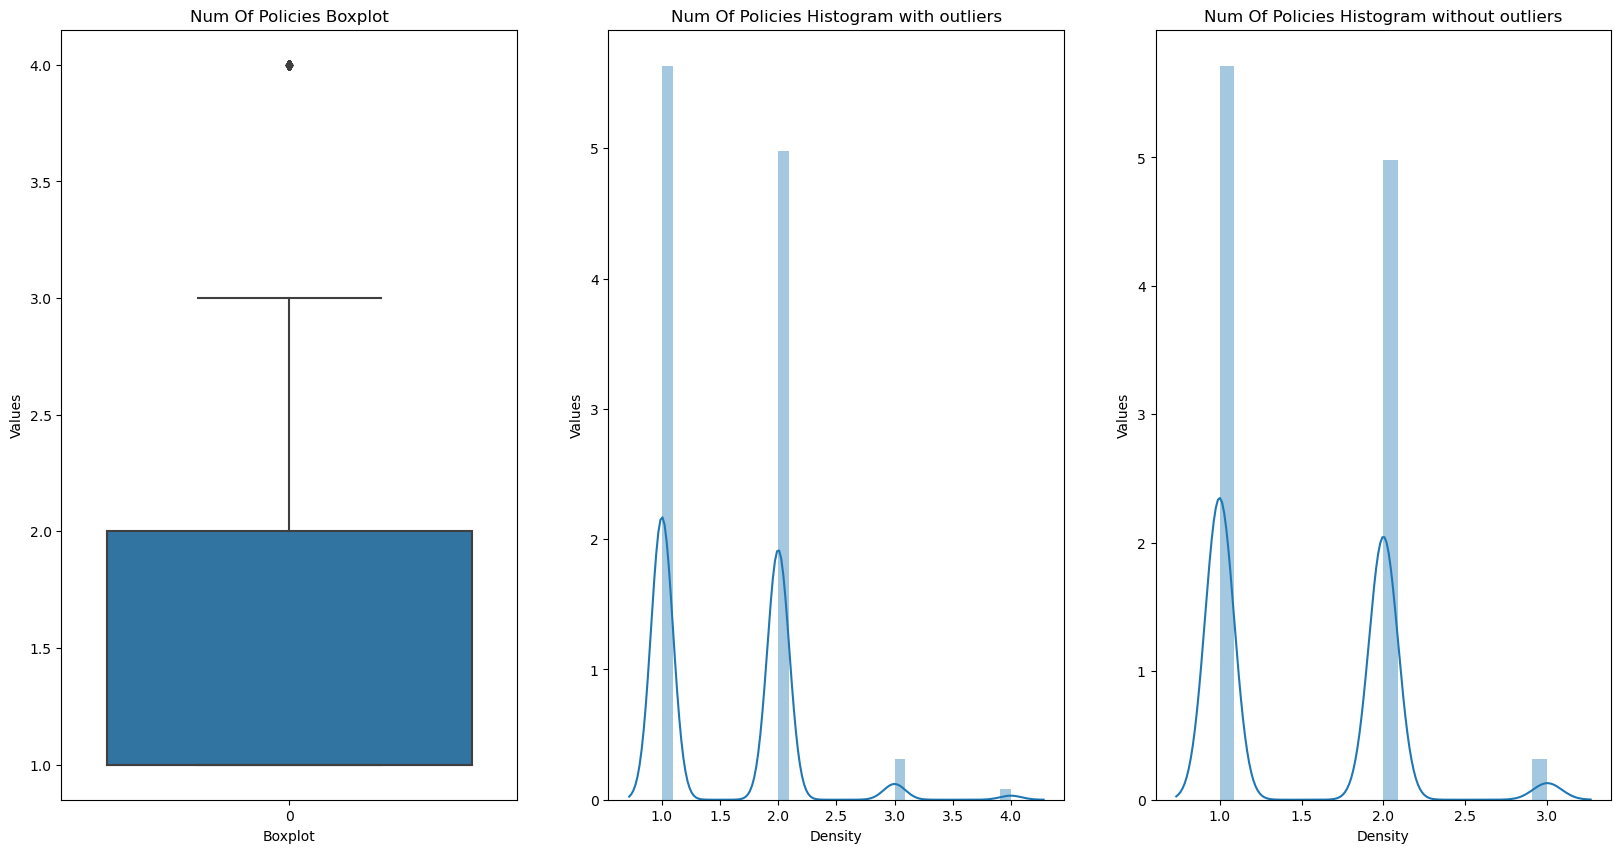

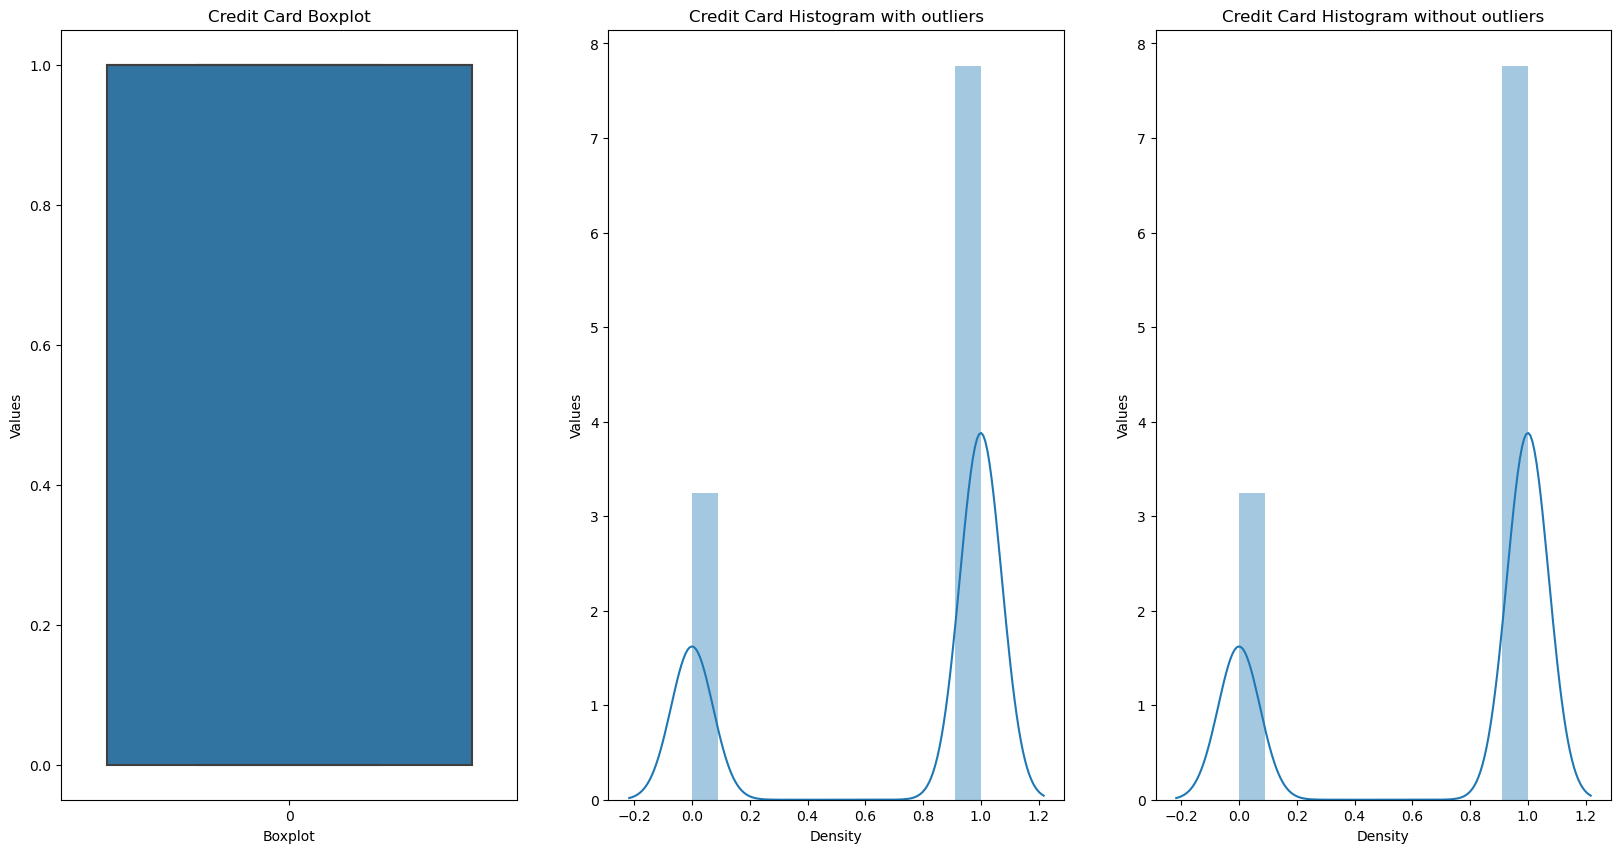

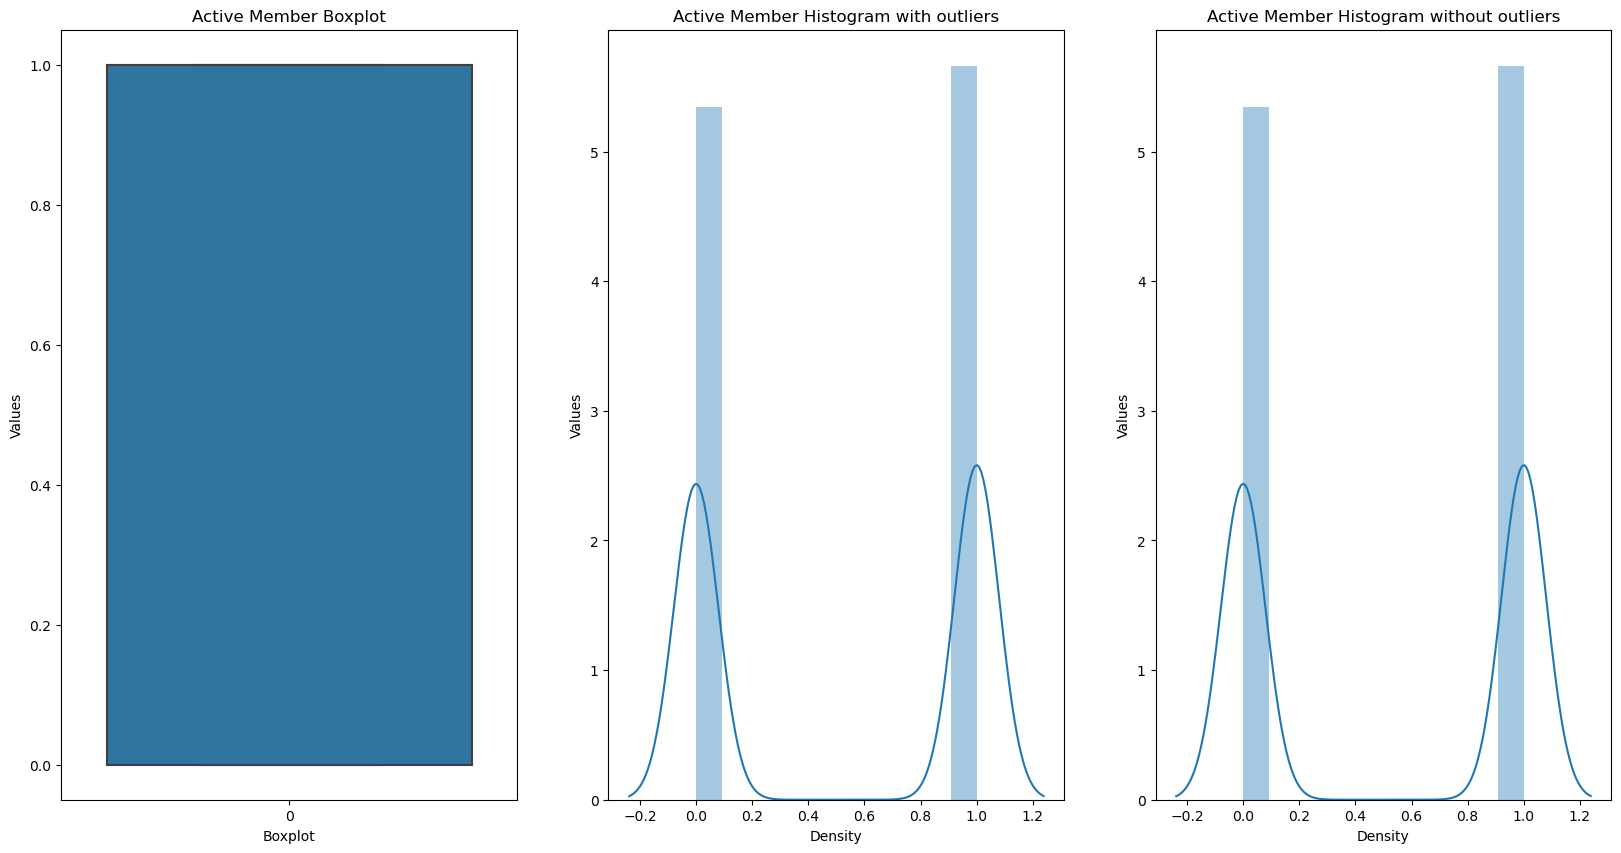

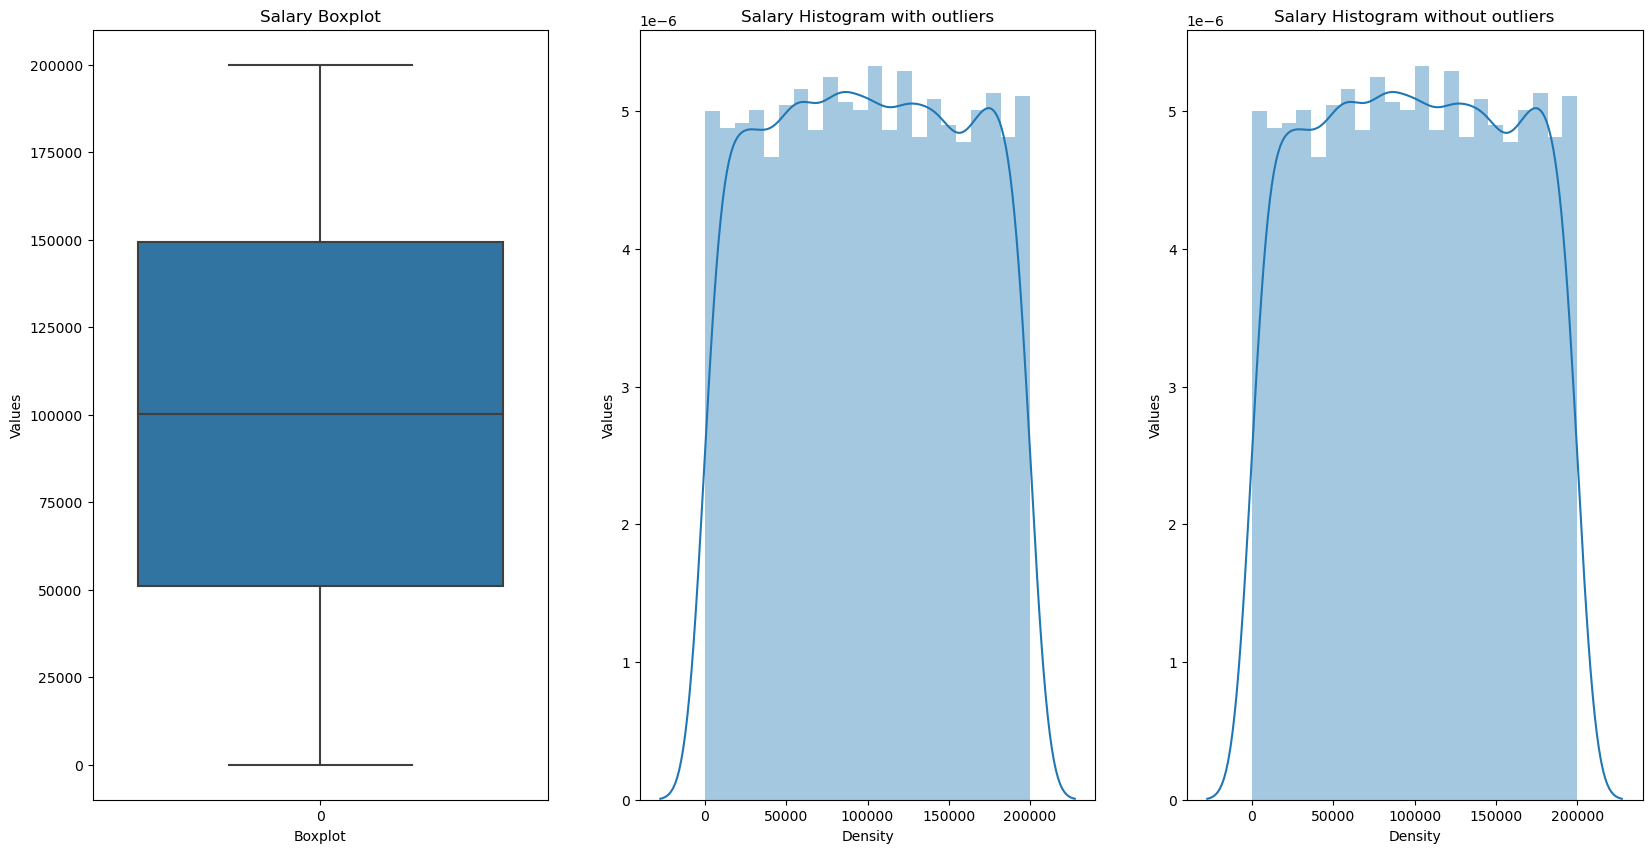

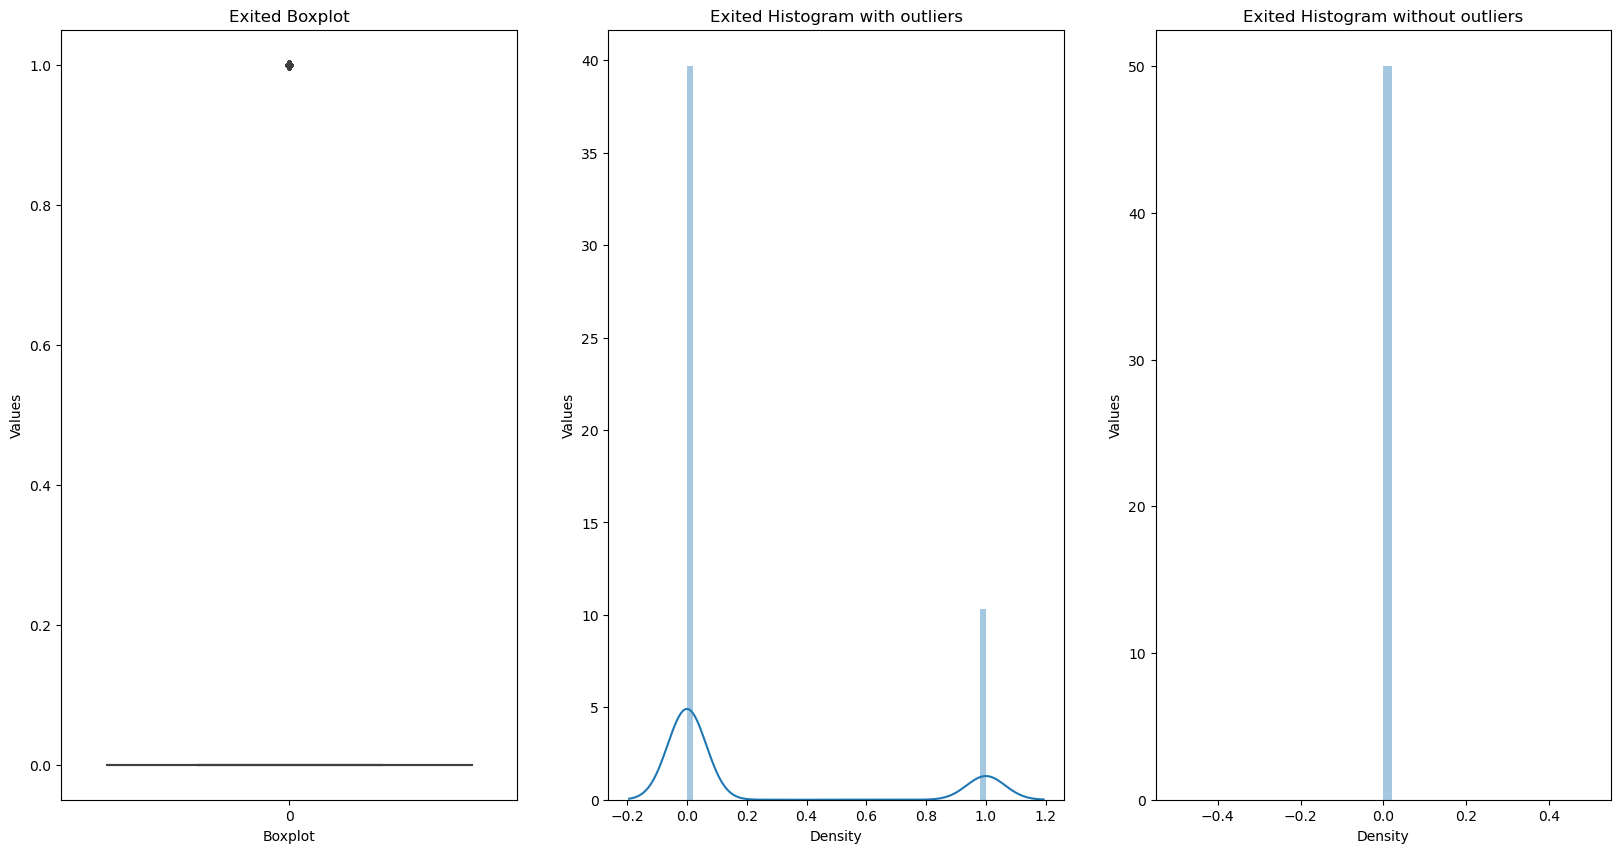

In [42]:
for col in df_copy.columns:
    odt_plot(df_copy,col)

# AS we have seen the outlier percentage is very low , so i wont affect the model , and since we are solving a problem in which our target variable is categorical no doesnt need to remove outlier . 

# so we are going to apply machine learning models which does not get affected by outliers
 .

# There is issue with logistic regrssion as higher range outliers affect it

# But in this case we dont have higher range outliers so it is fine to avoid outlier Treatment

# Correlation Plot

In [43]:
corr = df.corr()

<Axes: >

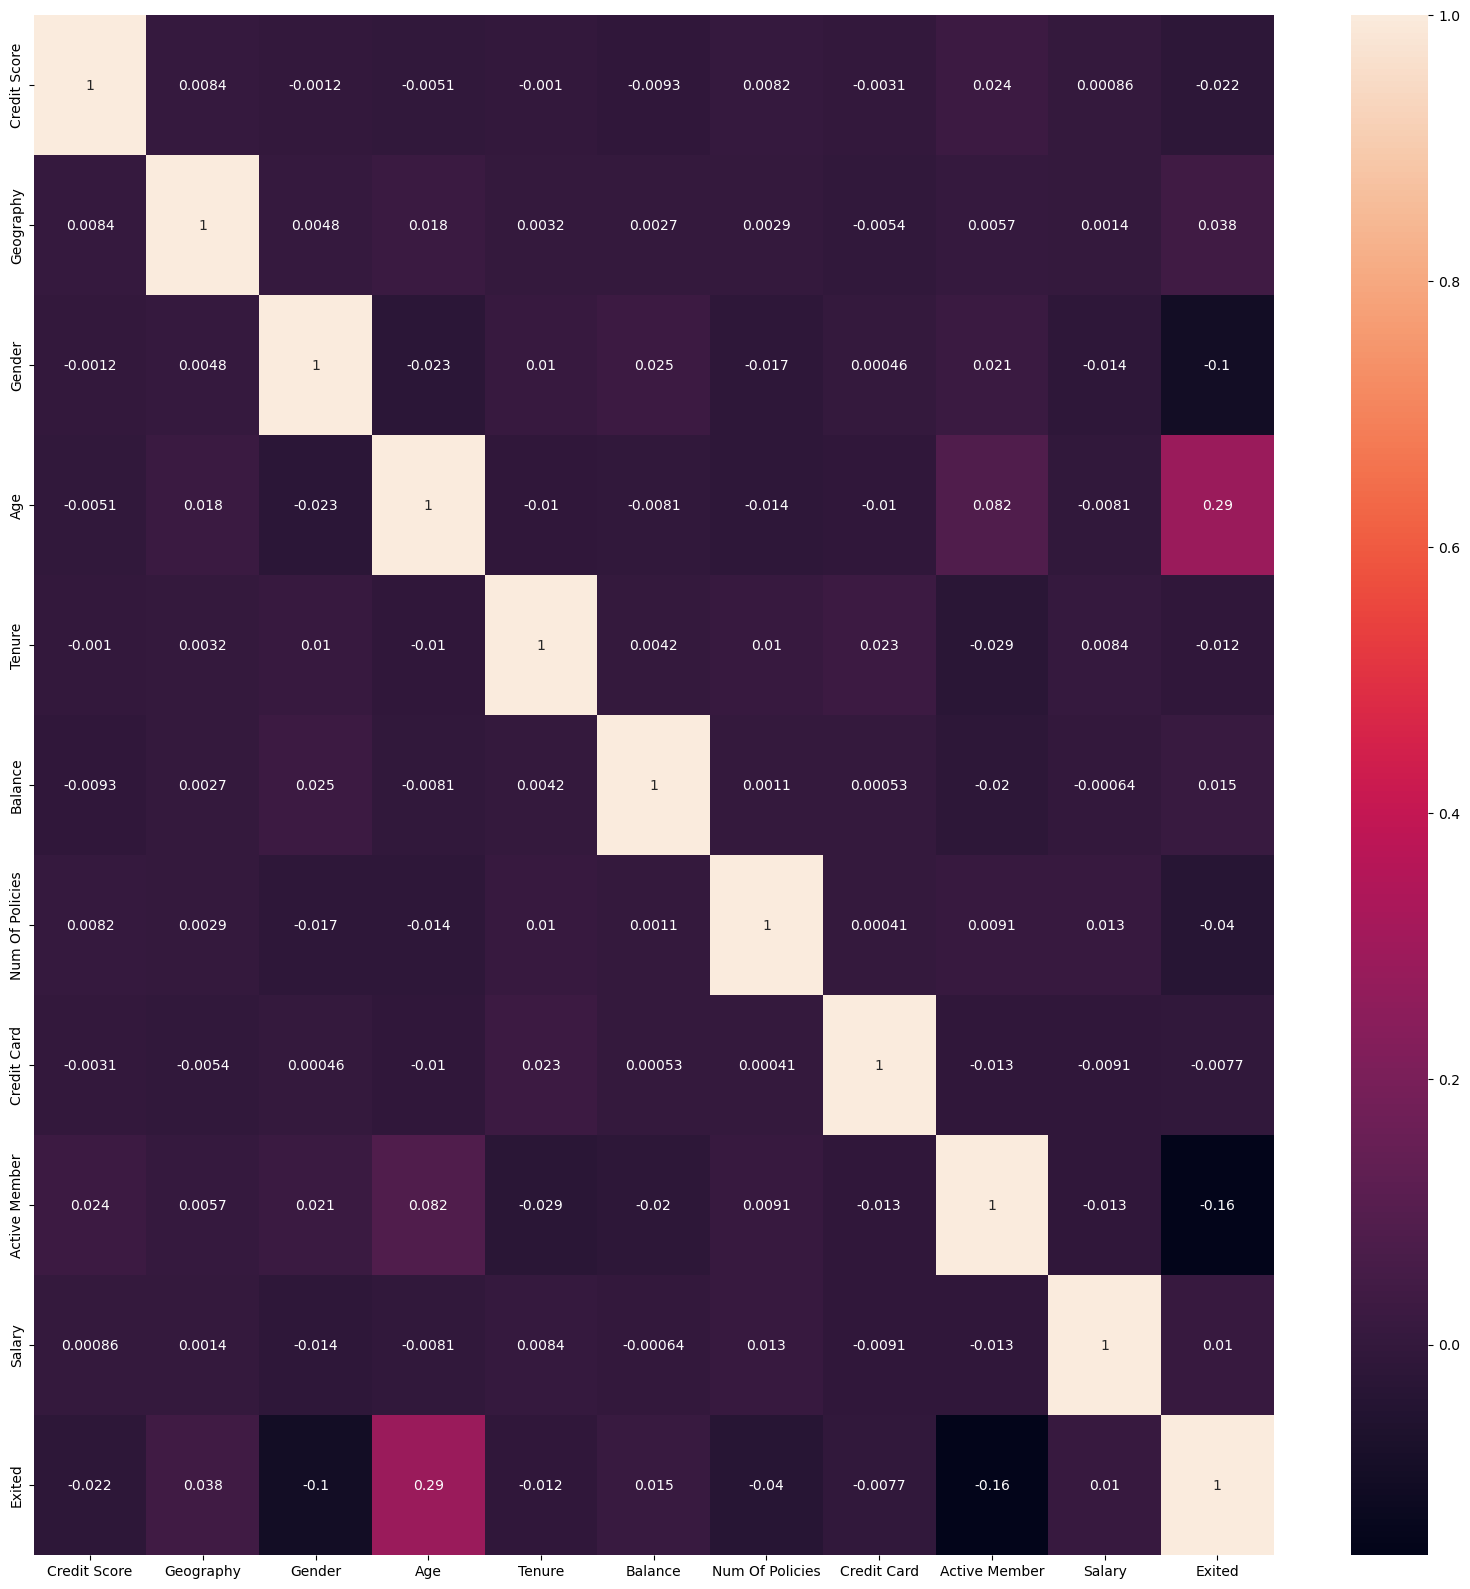

In [44]:
 f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True)

 1) Multi-collinearity is not present in the data.
 2) Age has a good positive correlation with target variable which is exited.
 3) Activeness of a person and target variable has week negative correlation.
 4) multicollinearity is not present in the data.

In [45]:
#sm = SMOTE(random_state=42)
#x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

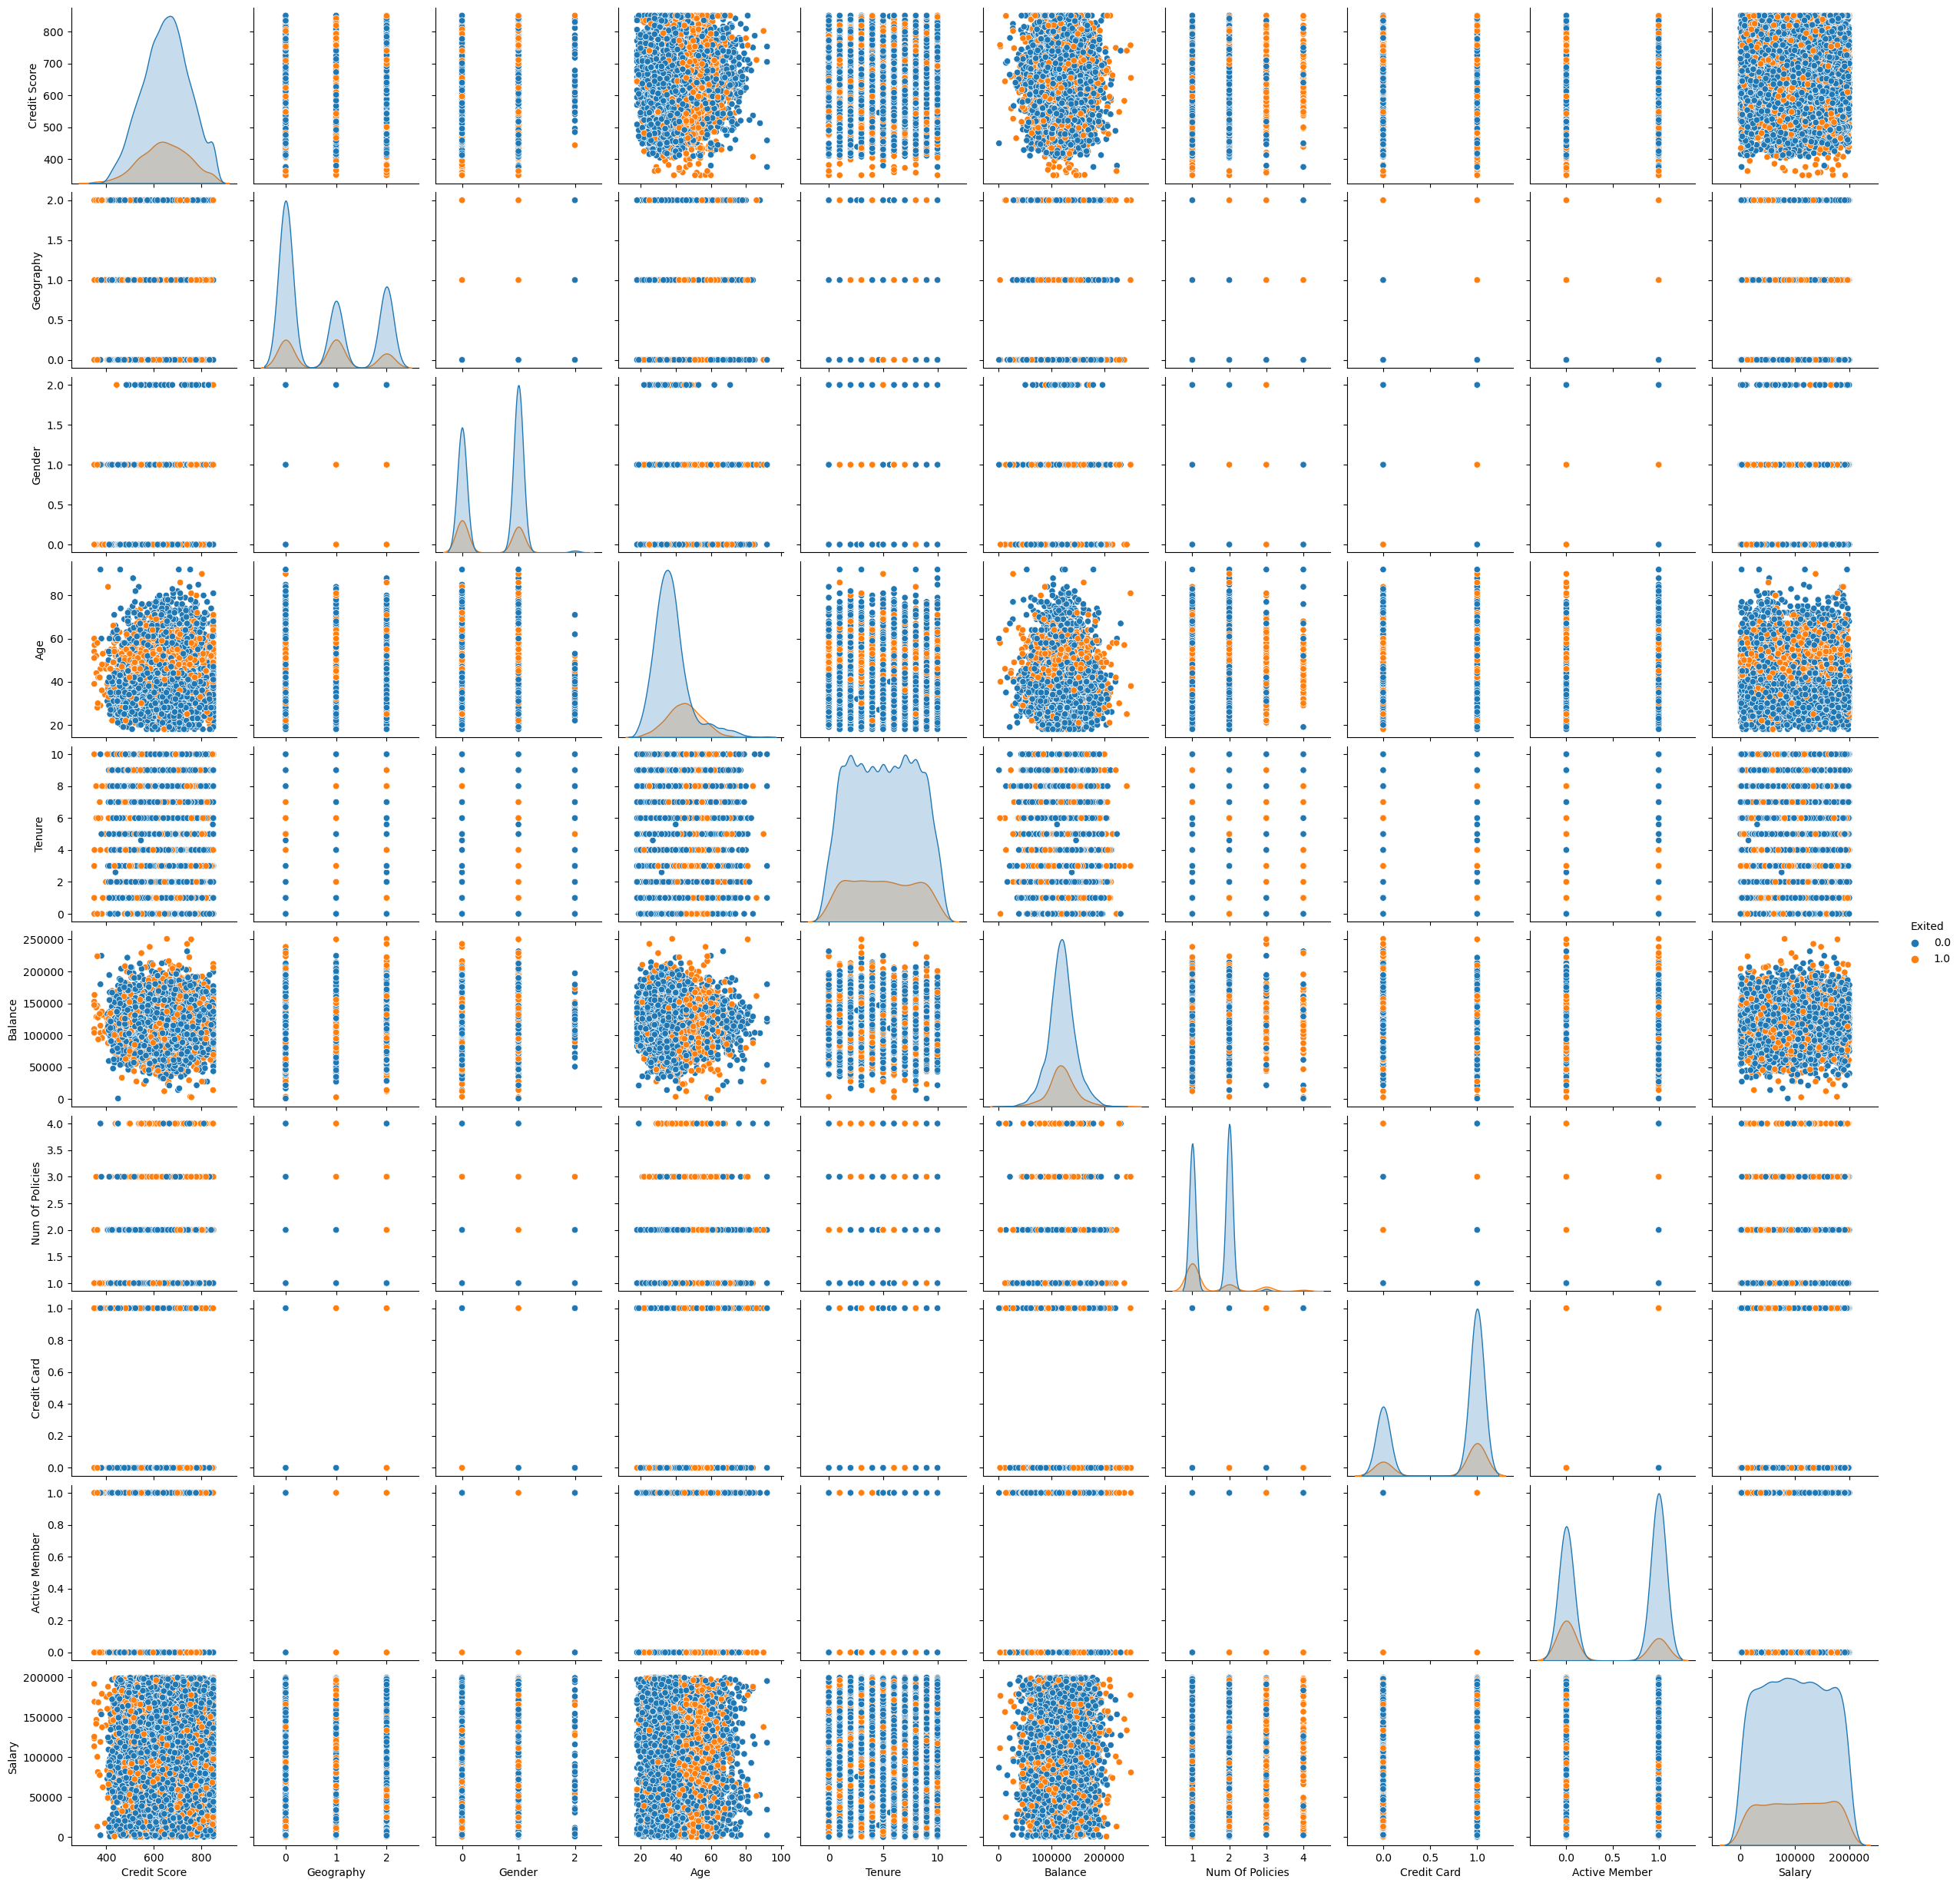

In [46]:
sns.pairplot(df,hue='Exited')

 
1) From above regplots we can say that there is lot of overlapping so there are vary less chances that
  logistic regression will work properly as it may have so much errrors and accurcay will be low.
2) There is high chances that Decision Tree classifier or Random forest classifier may work better in this
  case beacuase data is non-linear and above mentioned algorithms doesnt get affected by non-linearity
  in the features.
3) As well we can see typical grouping in graph so ensamble techniques may work well.
  Lets check out which algorithm works best on this data.

# Separting dependent and independent features

In [47]:
x = df.drop('Exited',axis=1)
y = df[['Exited']]

# Model Building

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9832 entries, 0 to 9831
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Credit Score     9832 non-null   float64
 1   Geography        9832 non-null   float64
 2   Gender           9832 non-null   float64
 3   Age              9832 non-null   float64
 4   Tenure           9832 non-null   float64
 5   Balance          9832 non-null   float64
 6   Num Of Policies  9832 non-null   float64
 7   Credit Card      9832 non-null   float64
 8   Active Member    9832 non-null   float64
 9   Salary           9832 non-null   float64
 10  Exited           9832 non-null   float64
dtypes: float64(11)
memory usage: 845.1 KB


In [49]:
def build_model(model_name, model, x, y, test_size=0.3, random_state=42):
    under = RandomUnderSampler(random_state=random_state)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    x_train_un, y_train_un = under.fit_resample(x_train, y_train)

    model.fit(x_train_un, y_train_un)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    f1_score_val = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return [model_name, acc_score, f1_score_val, precision, recall]

In [50]:
build_model('knn',KNeighborsClassifier(),x,y)

['knn',
 0.5003389830508475,
 0.2830739299610895,
 0.2012448132780083,
 0.47704918032786886]

In [51]:
def multiple_model(df, target_col):
    x = df.drop(target_col, axis=1)
    y = df[target_col]

    result_df = pd.DataFrame(columns=["Model_Name", "Accuracy_Score", "F1_Score", "Precision", "Recall"])

    result_df.loc[len(result_df)] = build_model("Logistic_Regression", LogisticRegression(), x, y)
    result_df.loc[len(result_df)] = build_model("Ridge_Classifier", RidgeClassifier(alpha=1.0), x, y)
    result_df.loc[len(result_df)] = build_model("KNN_Classifier", KNeighborsClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("Decision_Tree_Classifier", DecisionTreeClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("Random_Forest_Classifier", RandomForestClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("AdaBoost_Classifier", AdaBoostClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("GBoost_Classifier", GradientBoostingClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("XGB_Classifier", XGBClassifier(max_depth=3), x, y)
    result_df.loc[len(result_df)] = build_model("Support_Vector_Classifier", SVC(), x, y)

    return result_df.sort_values("Recall", ascending=False)


In [52]:
multiple_model(df,'Exited')

,Model_Name,Accuracy_Score,F1_Score,Precision,Recall
6,GBoost_Classifier,0.781695,0.589286,0.482255,0.757377
7,XGB_Classifier,0.775254,0.579048,0.472539,0.747541
5,AdaBoost_Classifier,0.774576,0.576163,0.471324,0.740984
4,Random_Forest_Classifier,0.775932,0.576553,0.473186,0.737705
3,Decision_Tree_Classifier,0.706102,0.504288,0.387182,0.722951
0,Logistic_Regression,0.668814,0.459923,0.346956,0.681967
1,Ridge_Classifier,0.685085,0.464553,0.358222,0.660656
2,KNN_Classifier,0.500339,0.283074,0.201245,0.477049
8,Support_Vector_Classifier,0.604407,0.257161,0.210198,0.331148


In [53]:
def stratified_k_fold_cross_validation(df, target='Exited'):
    x = df.drop(target, axis=1)
    y = df[target]
    
    models = [
        ('Logistic_Regression', LogisticRegression(class_weight='balanced')),
        ('Ridge_Classifier', RidgeClassifier(class_weight='balanced')),
        ('KNN_Classifier', KNeighborsClassifier()),
        ('Decision_Tree_Classifier', DecisionTreeClassifier(class_weight='balanced')),
        ('Random_Forest_Classifier', RandomForestClassifier(class_weight='balanced')),
        ('Adaboost_Classifier', AdaBoostClassifier()),
        ('GBoost_Classifier', GradientBoostingClassifier()),
        ('Xgboost_classifier', XGBClassifier(scale_pos_weight=(y == 0).sum() / (y == 1).sum())),
        ('Support_Vector_Classifier', SVC(class_weight='balanced')),
        ('EasyEnsemble Model',EasyEnsembleClassifier())
    ]
    
    results = []
    stf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    for model_name, model in models:
        accuracies = []
        precisions = []
        recalls = []
        f1s = []
        
        for train_index, test_index in stf.split(x, y):
            x_train, x_test = x.iloc[train_index], x.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            under = RandomUnderSampler(random_state=42)
            x_train_un, y_train_un = under.fit_resample(x_train, y_train)
            
            model.fit(x_train_un, y_train_un)
            y_pred = model.predict(x_test)
            
            accuracies.append(accuracy_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred))
            recalls.append(recall_score(y_test, y_pred))
            f1s.append(f1_score(y_test, y_pred))
        
        results.append([
            model_name,
            np.mean(accuracies),
            np.mean(precisions),
            np.mean(recalls),
            np.mean(f1s)
        ])
    
    result_df = pd.DataFrame(results, columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
    return result_df.sort_values('Accuracy', ascending=False)

# Example usage:
# df = pd.read_csv('your_dataset.csv')
# result_df = stratified_k_fold_cross_validation(df, target='Exited')
# print(result_df)

In [54]:
result_df = stratified_k_fold_cross_validation(df,target='Exited')

In [55]:
result_df

,Model_Name,Accuracy,Precision,Recall,F1_Score
6,GBoost_Classifier,0.790380,0.496246,0.747532,0.596140
4,Random_Forest_Classifier,0.783973,0.486292,0.742613,0.587209
5,Adaboost_Classifier,0.777665,0.476898,0.745571,0.581162
9,EasyEnsemble Model,0.775429,0.473565,0.735229,0.575471
1,Ridge_Classifier,0.696404,0.370675,0.672745,0.477818
3,Decision_Tree_Classifier,0.683790,0.362960,0.698826,0.477557
0,Logistic_Regression,0.678197,0.351360,0.656496,0.457500
7,Xgboost_classifier,0.677280,0.372933,0.821846,0.512866
8,Support_Vector_Classifier,0.661197,0.231160,0.255520,0.222100
2,KNN_Classifier,0.501323,0.205006,0.491119,0.289218


In [56]:
result_df

,Model_Name,Accuracy,Precision,Recall,F1_Score
6,GBoost_Classifier,0.790380,0.496246,0.747532,0.596140
4,Random_Forest_Classifier,0.783973,0.486292,0.742613,0.587209
5,Adaboost_Classifier,0.777665,0.476898,0.745571,0.581162
9,EasyEnsemble Model,0.775429,0.473565,0.735229,0.575471
1,Ridge_Classifier,0.696404,0.370675,0.672745,0.477818
3,Decision_Tree_Classifier,0.683790,0.362960,0.698826,0.477557
0,Logistic_Regression,0.678197,0.351360,0.656496,0.457500
7,Xgboost_classifier,0.677280,0.372933,0.821846,0.512866
8,Support_Vector_Classifier,0.661197,0.231160,0.255520,0.222100
2,KNN_Classifier,0.501323,0.205006,0.491119,0.289218


<Axes: xlabel='Salary', ylabel='Exited'>

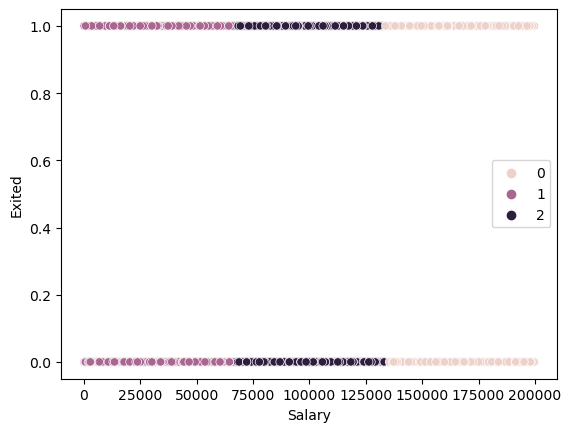

In [57]:
labels = KMeans(n_clusters=3,random_state=42).fit_predict(x) 
sns.scatterplot(x=df['Salary'],y=df['Exited'],hue=labels)

In [58]:
 df_salary_labels = pd.DataFrame(labels,columns=["Salary_Labels"])
 df_salary_labels.head()

,Salary_Labels
0,2
1,2
2,2
3,2
4,2


In [59]:
df_salary_labels.value_counts()

Salary_Labels
2                3307
1                3269
0                3256
Name: count, dtype: int64

In [60]:
x = pd.DataFrame(x)

In [61]:
x = x.join(df_salary_labels,how="inner")
x.head() 

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Salary_Labels
0,619.0,0.0,0.0,42.0,2.0,129900.792,1.0,1.0,1.0,101349.0,2
1,608.0,2.0,0.0,41.0,1.0,83807.860,1.0,0.0,1.0,112543.0,2
2,502.0,0.0,0.0,42.0,8.0,159660.800,3.0,1.0,0.0,113932.0,2
3,699.0,0.0,0.0,39.0,1.0,128183.062,2.0,0.0,0.0,93827.0,2
4,850.0,2.0,0.0,43.0,2.0,125510.820,1.0,1.0,1.0,79084.0,2


In [62]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def build_model(model_name, model, x, y):
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Calculate accuracy on the test set
    accuracy = model.score(x_test, y_test)
    
    return model_name, accuracy

def build_multiple_model(x, y):
    result_df = pd.DataFrame(columns=["Model_Name", "Accuracy_Score"])
    
    # Build models and store results
    result_df.loc[len(result_df)] = build_model("Logistic_Regression", LogisticRegression(), x, y)
    result_df.loc[len(result_df)] = build_model("Ridge_Classifier", RidgeClassifier(alpha=1.0), x, y)
    result_df.loc[len(result_df)] = build_model("KNN_Classifier", KNeighborsClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("Decision_Tree_Classifier", DecisionTreeClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("Random_Forest_Classifier", RandomForestClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("Adaboost_Classifier", AdaBoostClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("GBoost_Classifier", GradientBoostingClassifier(), x, y)
    result_df.loc[len(result_df)] = build_model("XGB_Classifier", XGBClassifier(max_depth=3), x, y)
    result_df.loc[len(result_df)] = build_model("Support_Vector_Classifier", SVC(), x, y)

    return result_df.sort_values("Accuracy_Score", ascending=False)

# Usage
# result = build_multiple_model(x, y)
# print(result)


In [63]:
build_multiple_model(x,y)

,Model_Name,Accuracy_Score
6,GBoost_Classifier,0.862227
7,XGB_Classifier,0.857143
5,Adaboost_Classifier,0.855618
4,Random_Forest_Classifier,0.853076
1,Ridge_Classifier,0.797661
8,Support_Vector_Classifier,0.795628
3,Decision_Tree_Classifier,0.785968
0,Logistic_Regression,0.784443
2,KNN_Classifier,0.750890


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def generate_learning_curve(model_name, estimator, X, y, folds=10):
    # Generate learning curve data
    train_size, train_score, test_score = learning_curve(estimator=estimator, X=X, y=y, cv=folds)

    # Calculate the mean scores
    train_score_mean = np.mean(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)

    # Plotting the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_size, train_score_mean, color="blue", label="Training Accuracy")
    plt.plot(train_size, test_score_mean, color="orange", label="Testing Accuracy")
    
    plt.xlabel("Number of Training Samples")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve: {model_name}")
    plt.legend()
    plt.grid()
    plt.show()




In [65]:
# Usage Example
# generate_learning_curve("Logistic Regression", LogisticRegression(), X, y)

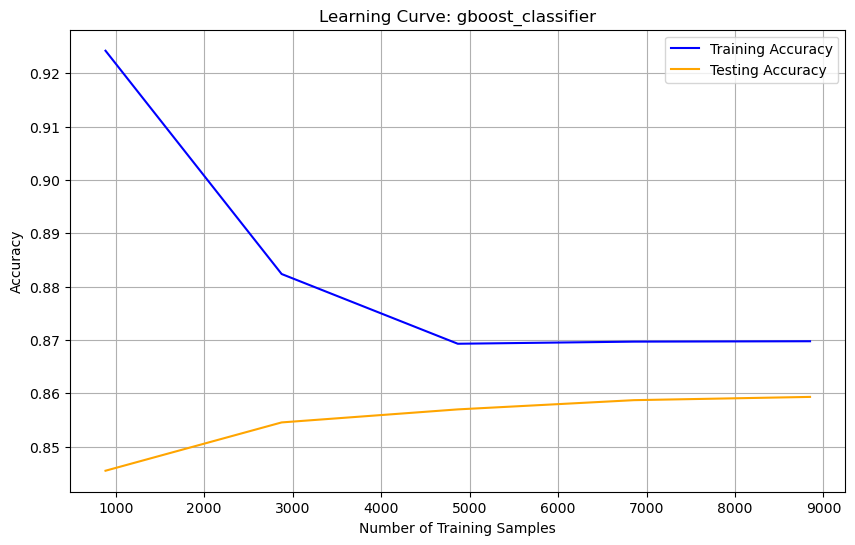

In [66]:
generate_learning_curve('gboost_classifier',GradientBoostingClassifier(),x,y)

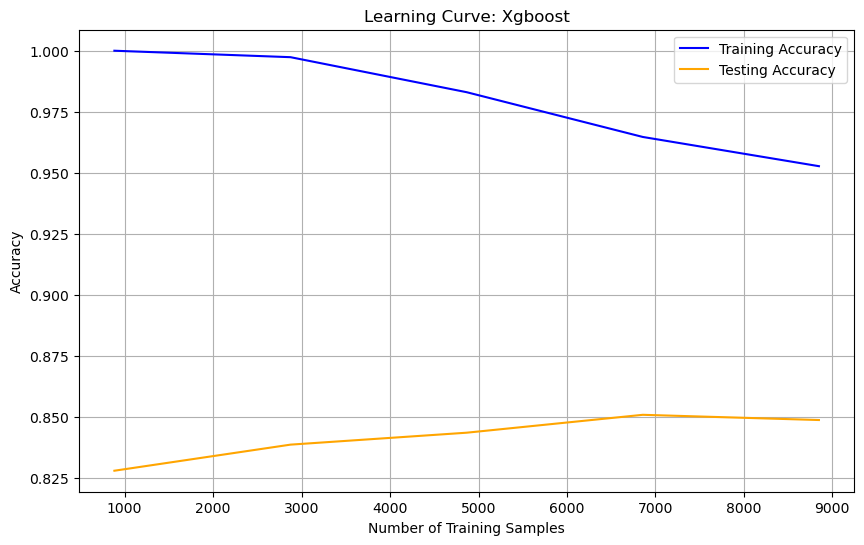

In [67]:
generate_learning_curve('Xgboost',XGBClassifier(),x,y)